Copyright (c) 2022 Mayur Khandetod

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.


**Abstract:**

Aim: To develop a prediction model that can determine whether a patient has lung cancer based on a set of risk indicators.
Description of data set: 
This dataset contains a List of Risk Factors for Lung Cancer. Based on the input values listed below, this dataset is used to forecast if a patient is likely to get lung cancer. Each row of data in the table contains pertinent information about the patient.
Description of fields:
•	Gender: 1(male), 0(female)
•	Age: Age of the patient
•	Smoking: YES=2 , NO=1. 
•	Yellow fingers: YES=2 , NO=1. 
•	Anxiety: YES=2 , NO=1.
•	Peer_pressure: YES=2 , NO=1.
•	Chronic Disease: YES=2 , NO=1.
•	Fatigue: YES=2 , NO=1.
•	Allergy: YES=2 , NO=1.
•	Wheezing: YES=2 , NO=1.
•	Alcohol: YES=2 , NO=1.
•	Coughing: YES=2 , NO=1.
•	Shortness of Breath: YES=2 , NO=1.
•	Swallowing Difficulty: YES=2 , NO=1.
•	Chest pain: YES=2 , NO=1.
•	Lung Cancer: YES=2 , NO=1.

Imported required libraries and train, test dataset. Set a minimum memory size and a run time. Start the H2O server on a random port. Import dataset using H2O. Split the data in training and test sets. Set the features and target. Set up AutoML. Train model using H2O. Display AML leaderboard. Find best model. Plot variable importance. Plot standardized coefficient magnitudes. Find best model accuracy. Plot partial plot for best model. Plot correlation matrix & heat map. Compute p-value. Performed regularization.   


In [144]:
pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [192]:
# Import libraries
# Use pip install or conda install if missing a library
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [146]:
# Set a minimum memory size and a run time in seconds
min_mem_size=6 
run_time=222

In [147]:
# Use 50% of availible resources
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

3


In [148]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:54320 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.13" 2021-10-19; OpenJDK Runtime Environment (build 11.0.13+8-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.13+8-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpo1a3xxra
  JVM stdout: /tmp/tmpo1a3xxra/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpo1a3xxra/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54320
Connecting to H2O server at http://127.0.0.1:54320 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.2
H2O_cluster_version_age:,19 days
H2O_cluster_name:,H2O_from_python_unknownUser_ds0in3
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [149]:
# Import the processed data from notebook One
#from google.colab import files
#file = files.upload()
url = "https://raw.githubusercontent.com/MayurAvinash/DESM_INFO6105/main/surveylungcancer.csv"
df = h2o.import_file(path = url)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [150]:
df.head()

GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,2
0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,2
1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,2
1,75,1,2,1,1,2,2,2,2,1,2,2,1,1,1
0,52,2,1,1,1,1,2,1,2,2,2,2,1,2,1
1,51,2,2,2,2,1,2,2,1,1,1,2,2,1,1
1,68,2,1,2,1,1,2,1,1,1,1,1,1,1,2
0,53,2,2,2,2,2,1,2,1,2,1,1,2,2,1


In [151]:
df.types

{'AGE': 'int',
 'ALCOHOL_CONSUMING': 'int',
 'ALLERGY': 'int',
 'ANXIETY': 'int',
 'CHEST_PAIN': 'int',
 'CHRONIC_DISEASE': 'int',
 'COUGHING': 'int',
 'FATIGUE': 'int',
 'GENDER': 'int',
 'LUNG_CANCER': 'int',
 'PEER_PRESSURE': 'int',
 'SHORTNESS_OF_BREATH': 'int',
 'SMOKING': 'int',
 'SWALLOWING_DIFFICULTY': 'int',
 'WHEEZING': 'int',
 'YELLOW_FINGERS': 'int'}

In [152]:
df['LUNG_CANCER'] = df['LUNG_CANCER'].asfactor()
print(df['LUNG_CANCER'].isfactor())

[True]


In [153]:
df.describe()

Rows:55394
Cols:16




,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
type,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,enum
mins,0.0,18.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,
mean,0.502003827129292,44.137614182041325,1.4995306350868336,1.4962992381846407,1.5006137848864498,1.4967686030978076,1.5010470448062982,1.4979239628840675,1.5019135646459905,1.5010650973029576,1.4984474852872165,1.5050546990648797,1.500758204859733,1.49996389500668,1.5016427771960865,
maxs,1.0,87.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,
sigma,0.5000004978097399,15.309217494376208,0.5000042928798124,0.4999908172360575,0.5000041364498418,0.49999407105604166,0.5000034168713465,0.5000002031976855,0.5000008514091558,0.5000033787414793,0.5000021028557717,0.49997896231916983,0.5000039383051423,0.5000045118816887,0.5000018144367121,
zeros,27586,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.0,69.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1
1,0.0,74.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1
2,1.0,59.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2


In [154]:
df.shape

(55394, 16)

In [155]:
# Create a 80/20 train/test split
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])

In [156]:
print(df_train.shape)
print(df_test.shape)

(44301, 16)
(11093, 16)


In [157]:
df_train.head()

GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,2
1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,2
0,52,2,1,1,1,1,2,1,2,2,2,2,1,2,1
1,51,2,2,2,2,1,2,2,1,1,1,2,2,1,1
1,68,2,1,2,1,1,2,1,1,1,1,1,1,1,2
0,53,2,2,2,2,2,1,2,1,2,1,1,2,2,1
1,61,2,2,2,2,2,2,1,2,1,2,2,2,1,1
0,72,1,1,1,1,2,2,2,2,2,2,2,1,2,1


In [158]:
# Set the features and target
X=df.columns
print(X)

['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH', 'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER']


In [159]:
# Set target and predictor variables
y ='LUNG_CANCER'
#y_numeric ='churn_bit'
X.remove(y) 
#X.remove(y_numeric) 
print(X)

['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH', 'SWALLOWING_DIFFICULTY', 'CHEST_PAIN']


In [160]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [161]:
aml.train(x=X,y=y,training_frame=df_train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_1_AutoML_1_20220214_21635


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,13.0,13.0,2155522.0,20.0,20.0,20.0,6933.0,14241.0,13226.385




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.3238324572480498
RMSE: 0.5690627884935456
LogLoss: 3.334480333320037
Mean Per-Class Error: 0.5
AUC: 0.5017736833828839
AUCPR: 0.49961968299903137
Gini: 0.0035473667657677233
Could not find exact threshold 0.0; using closest threshold found 0.0.
Could not find exact threshold 0.0; using closest threshold found 0.0.

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.0: 


,,1,2,Error,Rate
0,1,0.0,22203.0,1.0,(22203.0/22203.0)
1,2,0.0,21975.0,0.0,(0.0/21975.0)
2,Total,0.0,44178.0,0.5026,(22203.0/44178.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.000000,0.664369,399.0
1,max f2,0.000000,0.831895,399.0
2,max f0point5,0.000000,0.553005,399.0
3,max accuracy,0.833334,0.505365,43.0
4,max precision,0.833334,0.511245,43.0
5,max recall,0.000000,1.000000,399.0
6,max specificity,1.000000,0.924785,0.0
7,max absolute_mcc,0.833334,0.010394,43.0
8,max min_per_class_accuracy,0.500000,0.458497,190.0
9,max mean_per_class_accuracy,0.785751,0.503451,59.0



Gains/Lift Table: Avg response rate: 49.74 %, avg score: 49.55 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.075913,1.000000,1.012163,1.012163,0.503420,1.000000,0.503420,1.000000,0.076836,0.076836,1.216258,1.216258,0.001837
1,2,0.100111,0.866667,1.063429,1.024554,0.528918,0.895548,0.509583,0.974752,0.025733,0.102569,6.342890,2.455435,0.004891
2,3,0.156452,0.800000,1.018981,1.022547,0.506811,0.820006,0.508585,0.919025,0.057411,0.159980,1.898110,2.254730,0.007018
3,4,0.209318,0.750000,0.976099,1.010816,0.485482,0.754720,0.502750,0.877528,0.051602,0.211582,-2.390125,1.081620,0.004504
4,5,0.310783,0.666667,0.976437,0.999592,0.485651,0.685369,0.497167,0.814792,0.099074,0.310656,-2.356301,-0.040798,-0.000252
5,6,0.411593,0.571429,0.990431,0.997348,0.492611,0.604065,0.496051,0.763179,0.099846,0.410502,-0.956918,-0.265181,-0.002172
6,7,0.541297,0.500000,1.018934,1.002520,0.506787,0.503872,0.498624,0.701045,0.132159,0.542661,1.893372,0.252044,0.002714
7,8,0.604840,0.415757,1.003502,1.002624,0.499112,0.459222,0.498675,0.675640,0.063765,0.606426,0.350169,0.262353,0.003157
8,9,0.739058,0.333333,0.990071,1.000344,0.492432,0.362545,0.497541,0.618779,0.132886,0.739312,-0.992897,0.034390,0.000506
9,10,0.818943,0.250000,1.012957,1.001574,0.503815,0.269298,0.498153,0.584689,0.080920,0.820232,1.295690,0.157426,0.002565




ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.2880261248478747
RMSE: 0.5366806544378833
LogLoss: 0.9940862242284894
Mean Per-Class Error: 0.5
AUC: 0.5052076317921304
AUCPR: 0.4986992517128733
Gini: 0.010415263584260703
Could not find exact threshold 0.0; using closest threshold found 0.0.
Could not find exact threshold 0.0; using closest threshold found 0.0.

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.0: 


,,1,2,Error,Rate
0,1,0.0,22267.0,1.0,(22267.0/22267.0)
1,2,0.0,22034.0,0.0,(0.0/22034.0)
2,Total,0.0,44301.0,0.5026,(22267.0/44301.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.000000,0.664325,399.0
1,max f2,0.000000,0.831867,399.0
2,max f0point5,0.000000,0.552957,399.0
3,max accuracy,0.291618,0.505022,305.0
4,max precision,0.810618,0.501536,44.0
5,max recall,0.000000,1.000000,399.0
6,max specificity,1.000000,0.993488,0.0
7,max absolute_mcc,0.153442,0.021667,357.0
8,max min_per_class_accuracy,0.500000,0.479813,197.0
9,max mean_per_class_accuracy,0.291618,0.506825,305.0



Gains/Lift Table: Avg response rate: 49.74 %, avg score: 49.66 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.015327,0.916667,0.986040,0.986040,0.490427,0.956248,0.490427,0.956248,0.015113,0.015113,-1.395975,-1.395975,-0.000426
1,2,0.027945,0.888889,0.967522,0.977678,0.481216,0.892659,0.486268,0.927535,0.012208,0.027321,-3.247843,-2.232158,-0.001241
2,3,0.030112,0.875000,0.942457,0.975144,0.468750,0.876082,0.485007,0.923832,0.002042,0.029364,-5.754317,-2.485626,-0.001489
3,4,0.056003,0.833333,1.035963,1.003261,0.515257,0.839716,0.498992,0.884944,0.026822,0.056186,3.596301,0.326131,0.000363
4,5,0.120832,0.750000,0.992686,0.997588,0.493733,0.773783,0.496170,0.825304,0.064355,0.120541,-0.731381,-0.241247,-0.000580
5,6,0.154421,0.708333,1.006638,0.999556,0.500672,0.728553,0.497150,0.804259,0.033811,0.154352,0.663848,-0.044378,-0.000136
6,7,0.239927,0.666667,1.001041,1.000085,0.497888,0.674327,0.497413,0.757954,0.085595,0.239947,0.104109,0.008540,0.000041
7,8,0.305411,0.600000,0.997317,0.999492,0.496036,0.626564,0.497118,0.729782,0.065308,0.305256,-0.268294,-0.050816,-0.000309
8,9,0.408185,0.555556,1.016106,1.003675,0.505381,0.573391,0.499198,0.690405,0.104430,0.409685,1.610632,0.367509,0.002985
9,10,0.522765,0.500000,1.009644,1.004983,0.502167,0.517272,0.499849,0.652458,0.115685,0.525370,0.964432,0.498343,0.005183




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.497912,0.005194,0.490690,0.495824,0.497178,0.503386,0.502483
1,auc,0.504988,0.005167,0.513995,0.504052,0.501550,0.501617,0.503726
2,err,0.502088,0.005194,0.509310,0.504176,0.502822,0.496614,0.497517
3,err_count,4448.600000,46.198486,4513.000000,4467.000000,4455.000000,4400.000000,4408.000000
4,f0point5,0.553180,0.004835,0.546341,0.551427,0.552767,0.558897,0.556466
5,f1,0.664405,0.004273,0.658339,0.662944,0.664154,0.669670,0.666918
6,f2,0.831628,0.002544,0.828096,0.831000,0.831760,0.835206,0.832076
7,lift_top_group,1.010393,0.096343,0.885338,1.054965,0.946518,1.032556,1.132587
8,logloss,0.994080,0.180725,1.262024,0.982136,1.006631,0.965853,0.753757
9,max_per_class_error,0.998240,0.003935,1.000000,1.000000,1.000000,1.000000,0.991200



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-02-14 02:18:28,20.086 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2022-02-14 02:18:29,21.399 sec,5.0,0.633807,10.127138,0.501678,0.498784,1.005377,0.502418
2,,2022-02-14 02:18:31,22.744 sec,10.0,0.584134,4.736959,0.498755,0.497748,1.008774,0.502578
3,,2022-02-14 02:18:31,23.514 sec,13.0,0.569063,3.334480,0.501774,0.499620,1.012163,0.502580



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,AGE,38928.175781,1.000000,0.469997
1,ALCOHOL_CONSUMING,3961.912598,0.101775,0.047834
2,FATIGUE,3698.692383,0.095013,0.044656
3,YELLOW_FINGERS,3558.249512,0.091406,0.042960
4,ANXIETY,3439.472168,0.088354,0.041526
5,SMOKING,3283.860352,0.084357,0.039648
6,ALLERGY,3265.233887,0.083878,0.039423
7,WHEEZING,3221.046387,0.082743,0.038889
8,COUGHING,3153.704102,0.081013,0.038076
9,SHORTNESS_OF_BREATH,2925.845947,0.075160,0.035325


In [162]:
print(aml.leaderboard)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
DRF_1_AutoML_1_20220214_21635,0.505208,0.994086,0.498699,0.5,0.536681,0.288026
XGBoost_1_AutoML_1_20220214_21635,0.504051,0.738324,0.502074,0.5,0.519549,0.269931
GBM_3_AutoML_1_20220214_21635,0.503556,0.694658,0.499148,0.499125,0.500778,0.250779
GBM_grid_1_AutoML_1_20220214_21635_model_1,0.503479,0.693309,0.50068,0.49908,0.500082,0.250082
GBM_1_AutoML_1_20220214_21635,0.503082,0.695685,0.497962,0.5,0.501256,0.251258
GBM_4_AutoML_1_20220214_21635,0.502949,0.699165,0.497586,0.499192,0.502949,0.252958
XGBoost_2_AutoML_1_20220214_21635,0.502358,0.739412,0.499221,0.5,0.519928,0.270325
XGBoost_grid_1_AutoML_1_20220214_21635_model_1,0.502185,0.708796,0.496785,0.499955,0.507384,0.257439
GBM_2_AutoML_1_20220214_21635,0.501285,0.693988,0.497123,0.49908,0.500453,0.250453
GBM_5_AutoML_1_20220214_21635,0.501167,0.693308,0.498056,0.499125,0.500119,0.250119


In [163]:
model_index=0
glm_index=0
glm_model=''
aml_leaderboard_df=aml.leaderboard.as_data_frame()
models_dict={}
for m in aml_leaderboard_df['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break 
  model_index=model_index+1  

for m in aml_leaderboard_df['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break  
  glm_index=glm_index+1     
models_dict

{'DRF_1_AutoML_1_20220214_21635': 0, 'GLM_1_AutoML_1_20220214_21635': 19}

In [164]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index,'model_id'])

0


In [165]:
best_model.algo

'drf'

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## DRF_1_AutoML_1_20220214_21635


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.49958256379801874: 


,,1,2,Error,Rate
0,1,21585.0,682.0,0.0306,(682.0/22267.0)
1,2,462.0,21572.0,0.021,(462.0/22034.0)
2,Total,22047.0,22254.0,0.0258,(1144.0/44301.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

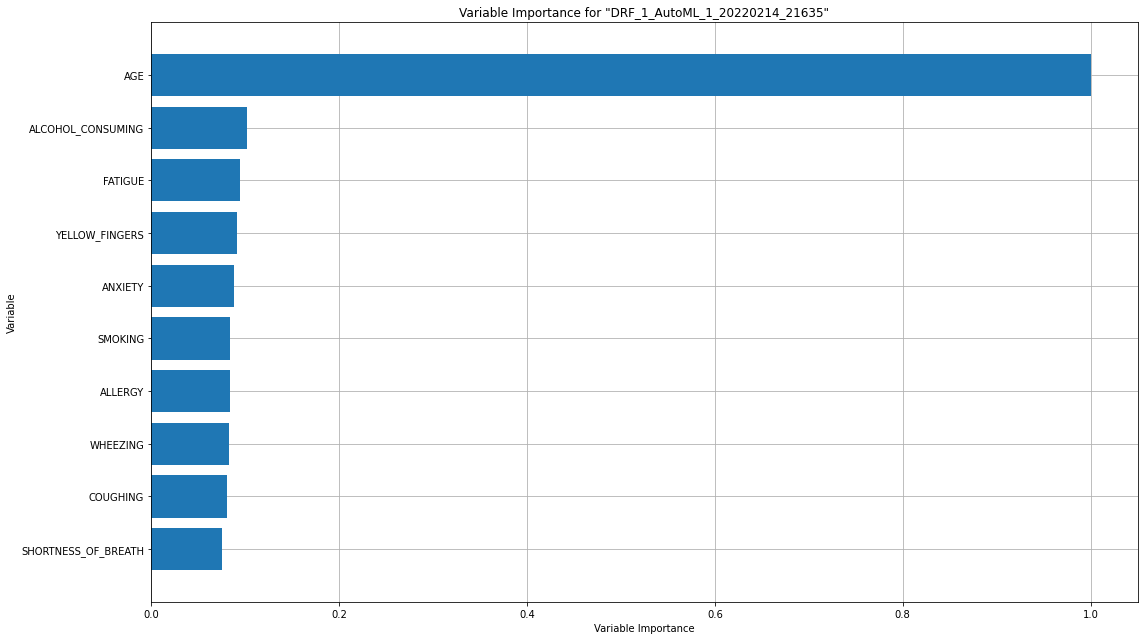

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

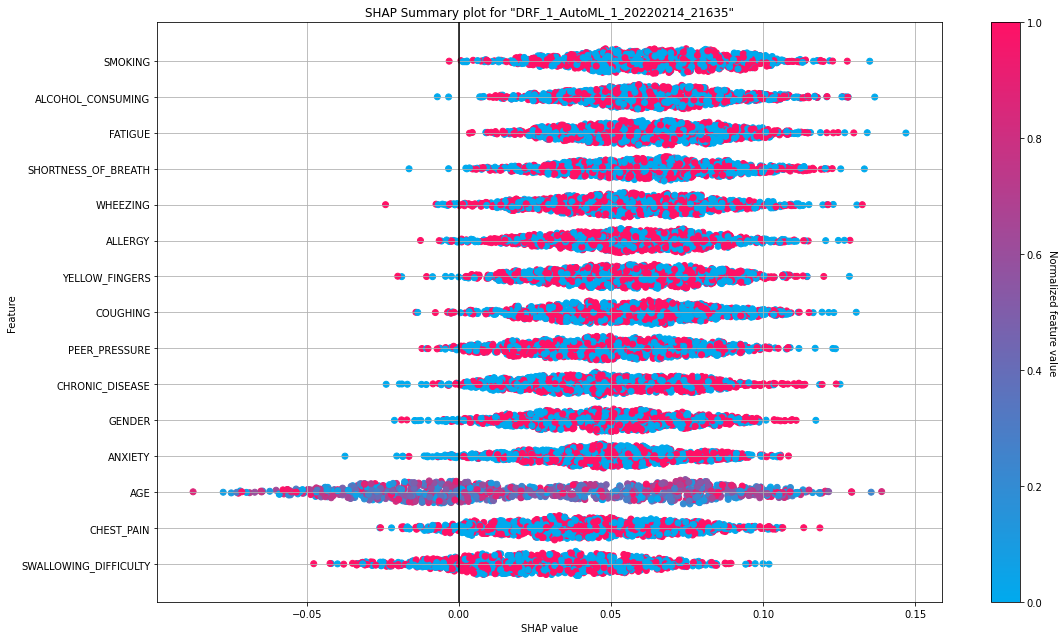

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

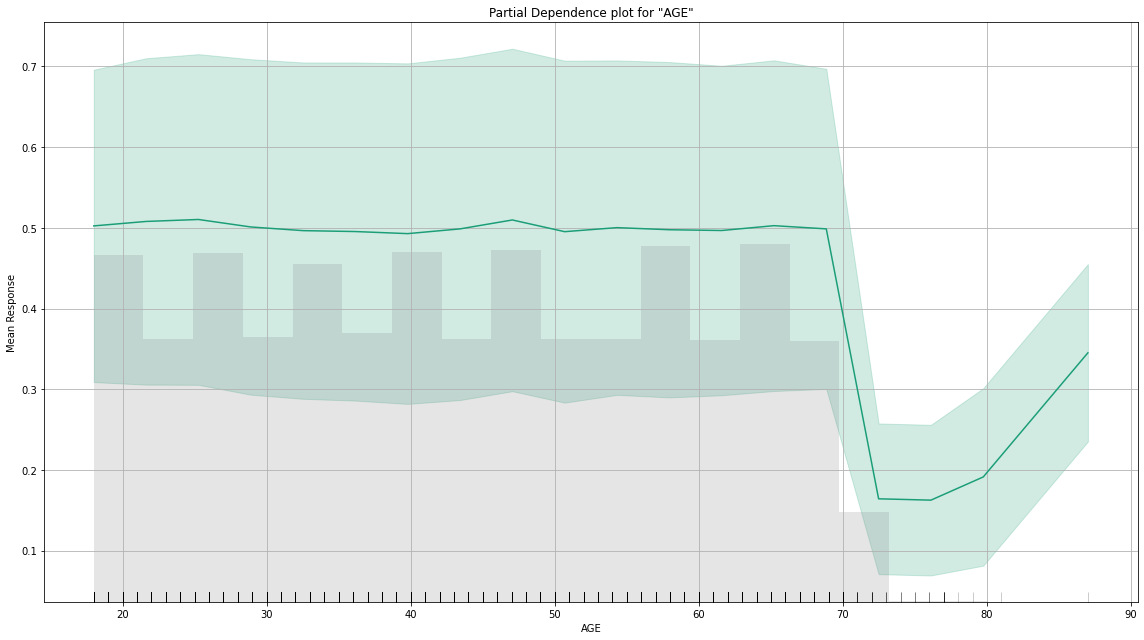

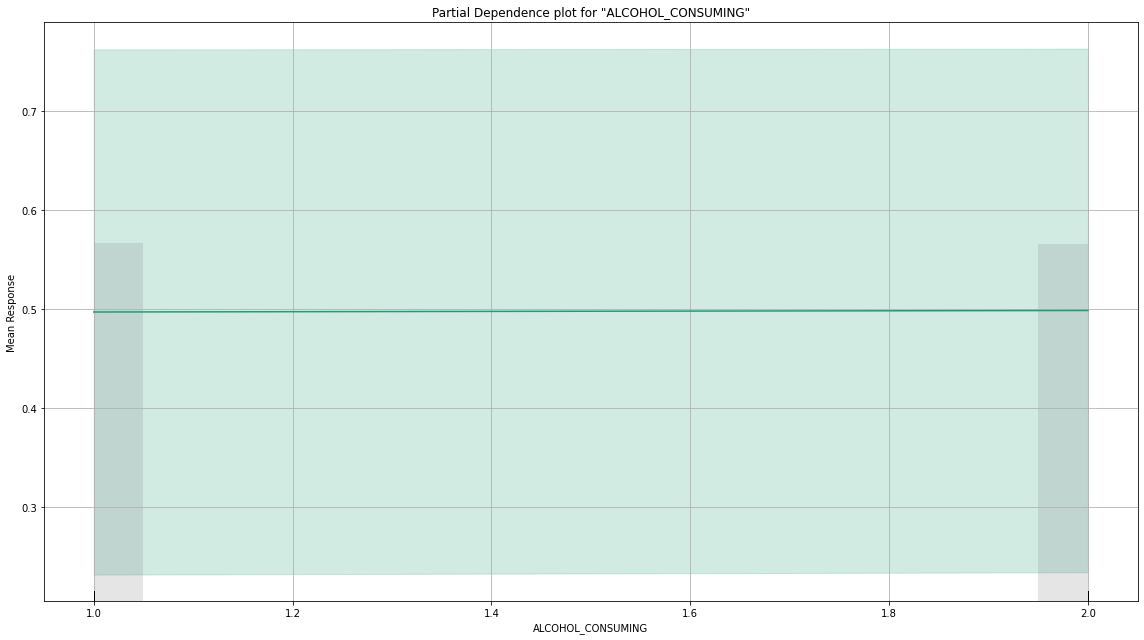

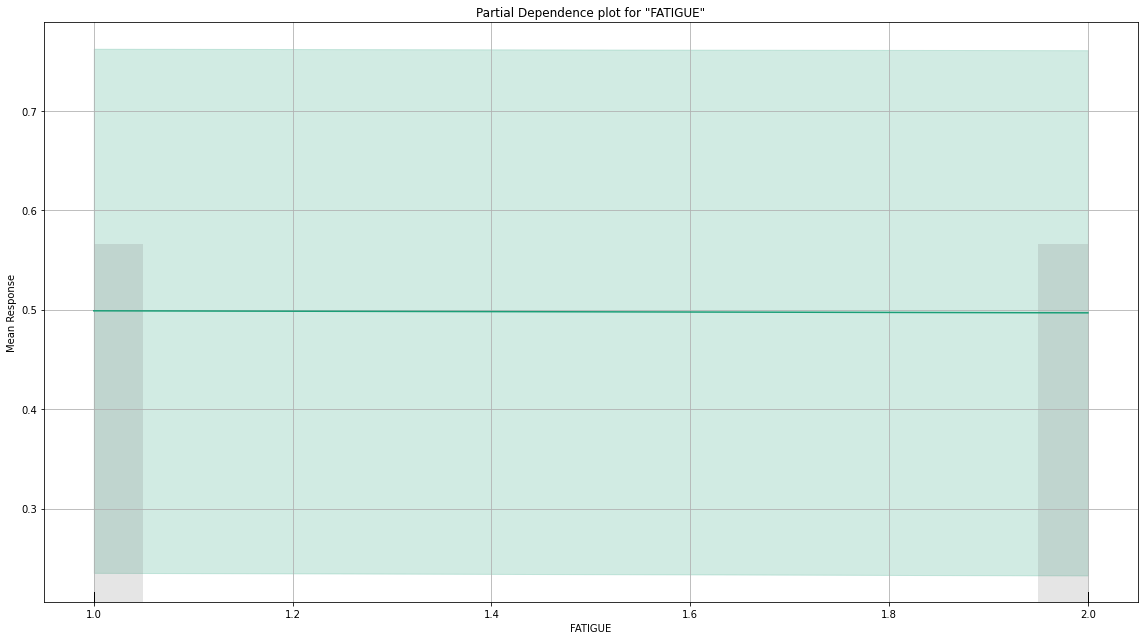

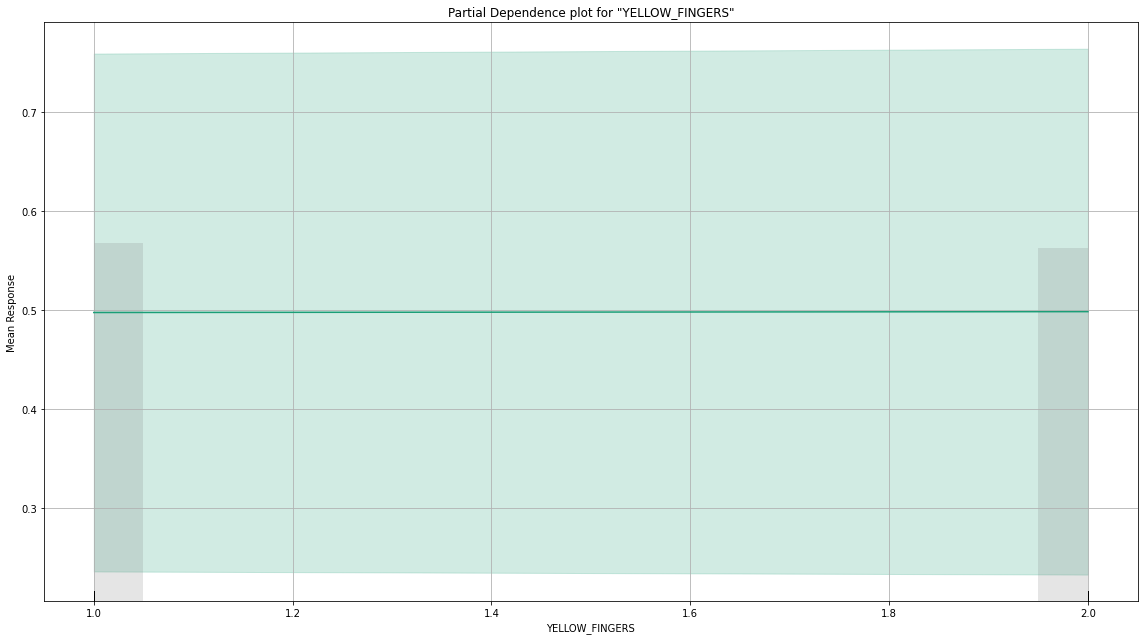

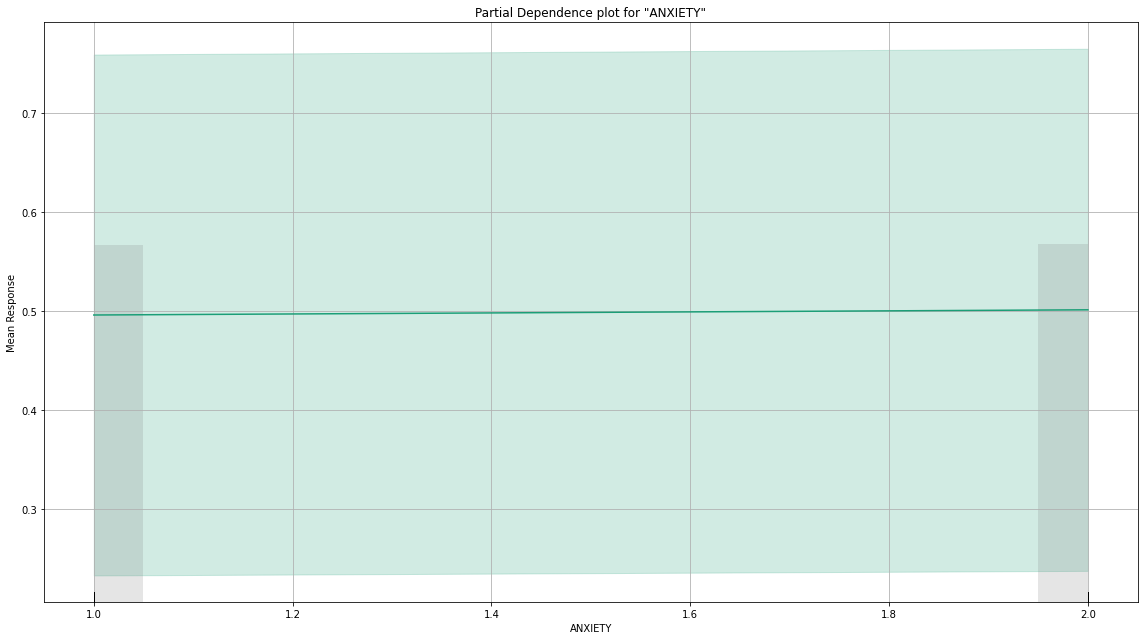

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## DRF_1_AutoML_1_20220214_21635


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.49958256379801874: 


,,1,2,Error,Rate
0,1,21585.0,682.0,0.0306,(682.0/22267.0)
1,2,462.0,21572.0,0.021,(462.0/22034.0)
2,Total,22047.0,22254.0,0.0258,(1144.0/44301.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

In [166]:
best_model.explain(df_train)

In [167]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category = matplotlib.cbook.mplDeprecation)

6. Does the model make sense?

Ans: No, the model does not make any sense because variable importance graph shows ‘AGE’ as the most significant variable whereas standardized coefficient magnitude shows ‘COUGHING’ as the most significant variable. We can perform regularization to make the model better.


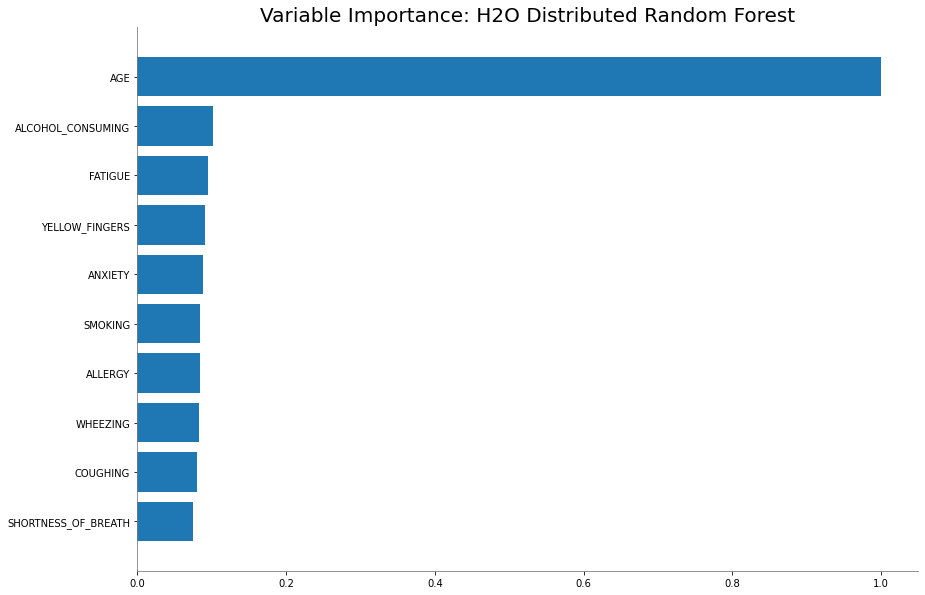

<Figure size 432x288 with 0 Axes>

In [168]:
if best_model.algo in ['gbm','drf','xrt','xgboost']:
  best_model.varimp_plot()

19
glm


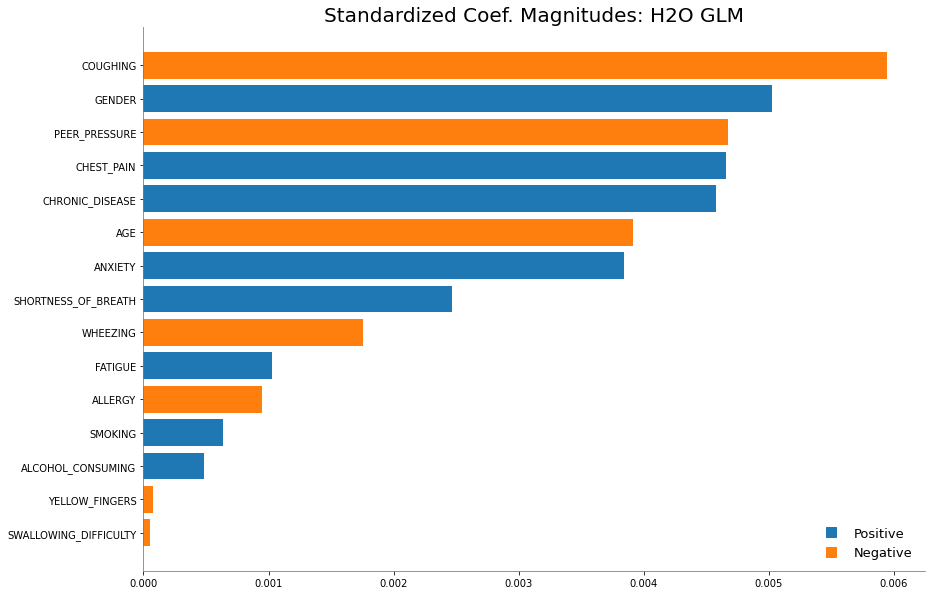

In [169]:
if glm_index is not 0:
  print(glm_index)
  glm_model=h2o.get_model(aml.leaderboard[glm_index,'model_id'])
  print(glm_model.algo) 
  glm_model.std_coef_plot()

In [170]:
print(best_model.auc(train = True))

0.5017736833828839


In [171]:
def model_performance_stats(perf):
    d={}
    try:    
      d['mse']=perf.mse()
    except:
      pass      
    try:    
      d['rmse']=perf.rmse() 
    except:
      pass      
    try:    
      d['null_degrees_of_freedom']=perf.null_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_degrees_of_freedom']=perf.residual_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_deviance']=perf.residual_deviance() 
    except:
      pass      
    try:    
      d['null_deviance']=perf.null_deviance() 
    except:
      pass      
    try:    
      d['aic']=perf.aic() 
    except:
      pass      
    try:
      d['logloss']=perf.logloss() 
    except:
      pass    
    try:
      d['auc']=perf.auc()
    except:
      pass  
    try:
      d['gini']=perf.gini()
    except:
      pass    
    return d

In [172]:
mod_perf=best_model.model_performance(df_test)
stats_test={}
stats_test=model_performance_stats(mod_perf)
stats_test

{'auc': 0.5074573965942768,
 'gini': 0.014914793188553599,
 'logloss': 0.874280324036632,
 'mse': 0.28682120863476124,
 'null_degrees_of_freedom': None,
 'null_deviance': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'rmse': 0.5355569144682583}

In [173]:
predictions = best_model.predict(df_test)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## DRF_1_AutoML_1_20220214_21635

Could not find exact threshold 0.0; using closest threshold found 0.0.

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.0: 


,,1,2,Error,Rate
0,1,0.0,5646.0,1.0,(5646.0/5646.0)
1,2,0.0,5447.0,0.0,(0.0/5447.0)
2,Total,0.0,11093.0,0.509,(5646.0/11093.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

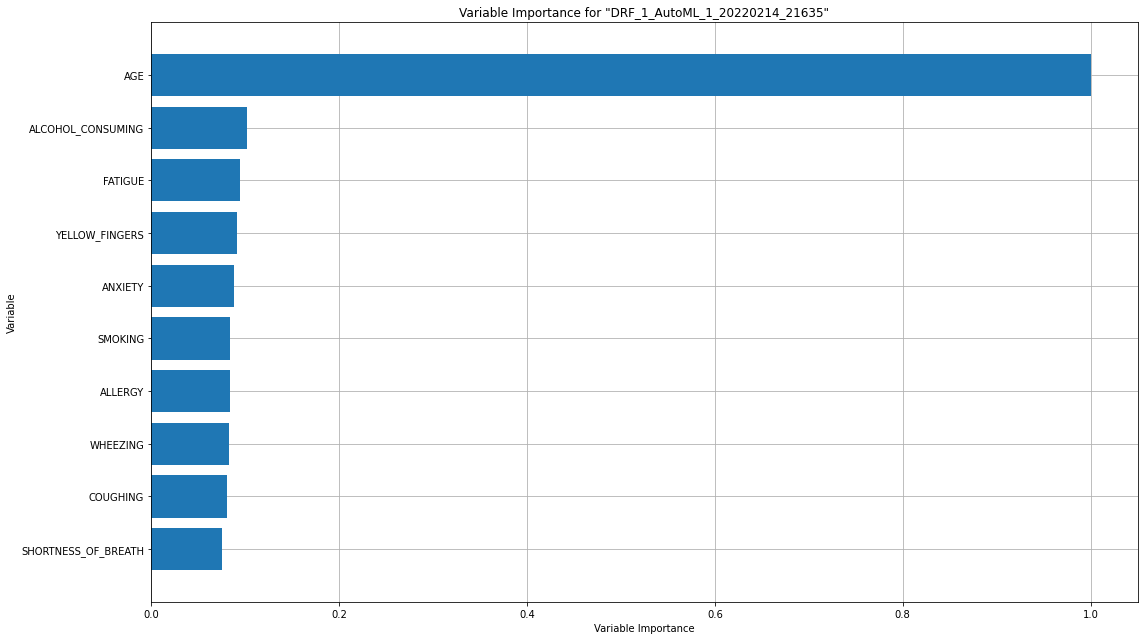

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

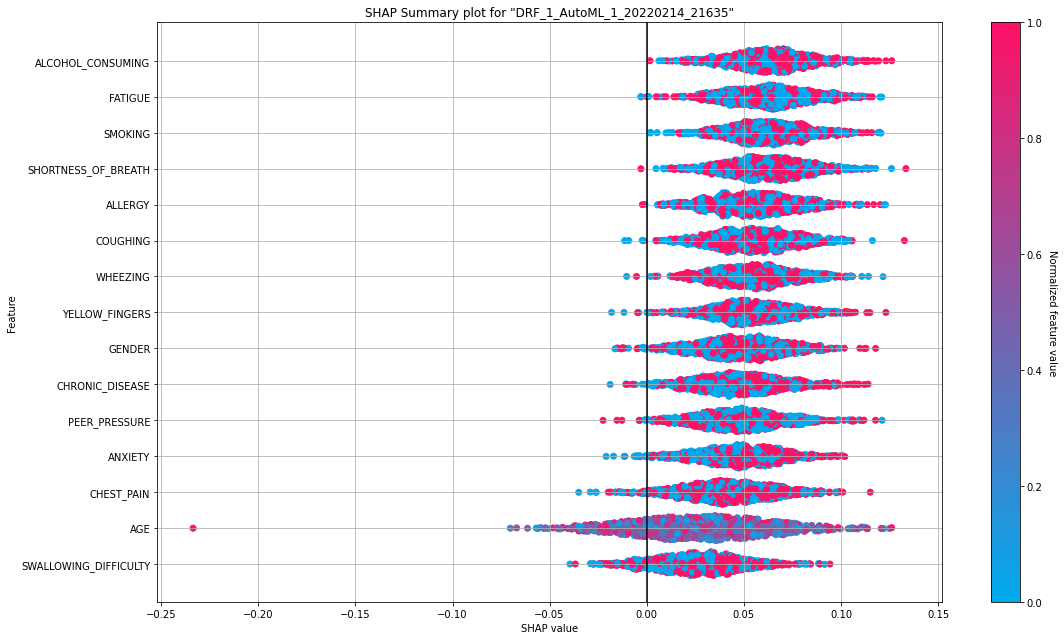

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

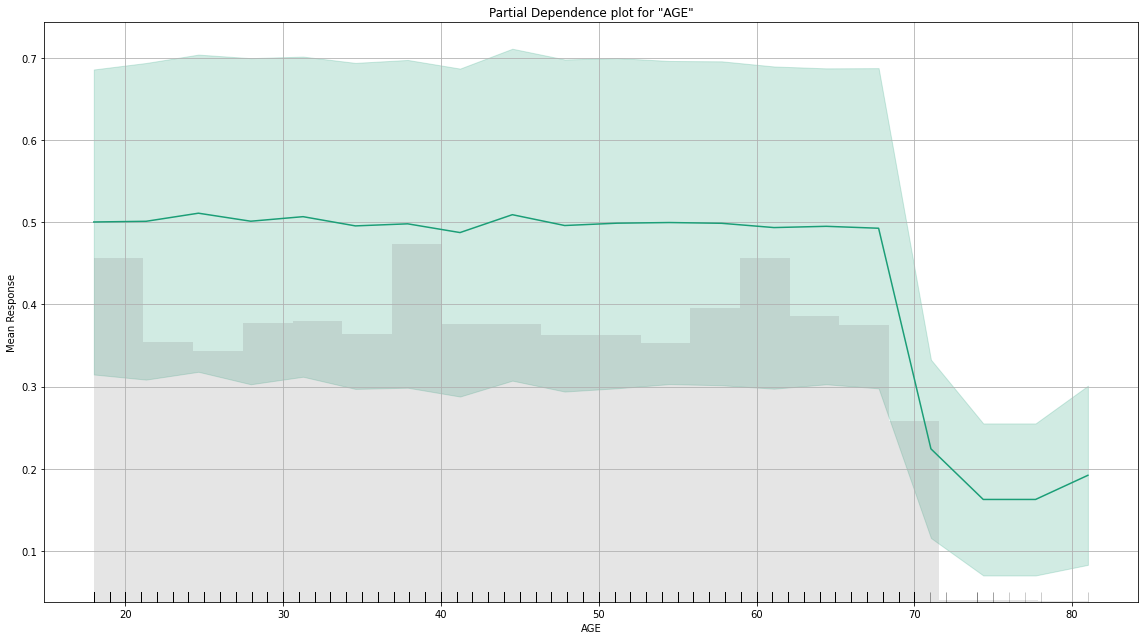

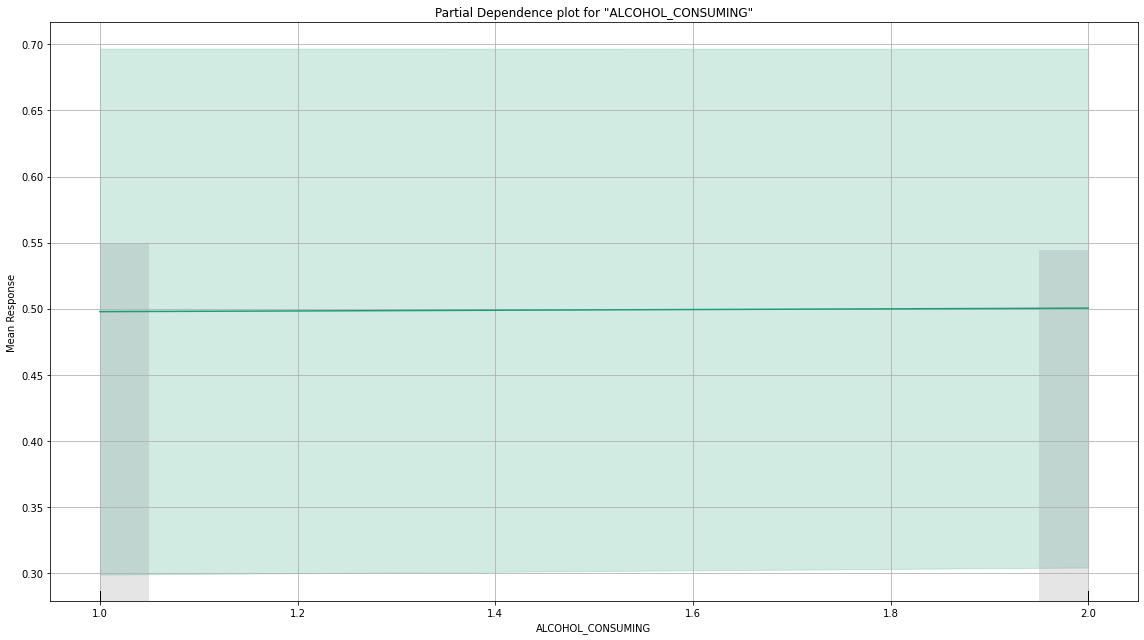

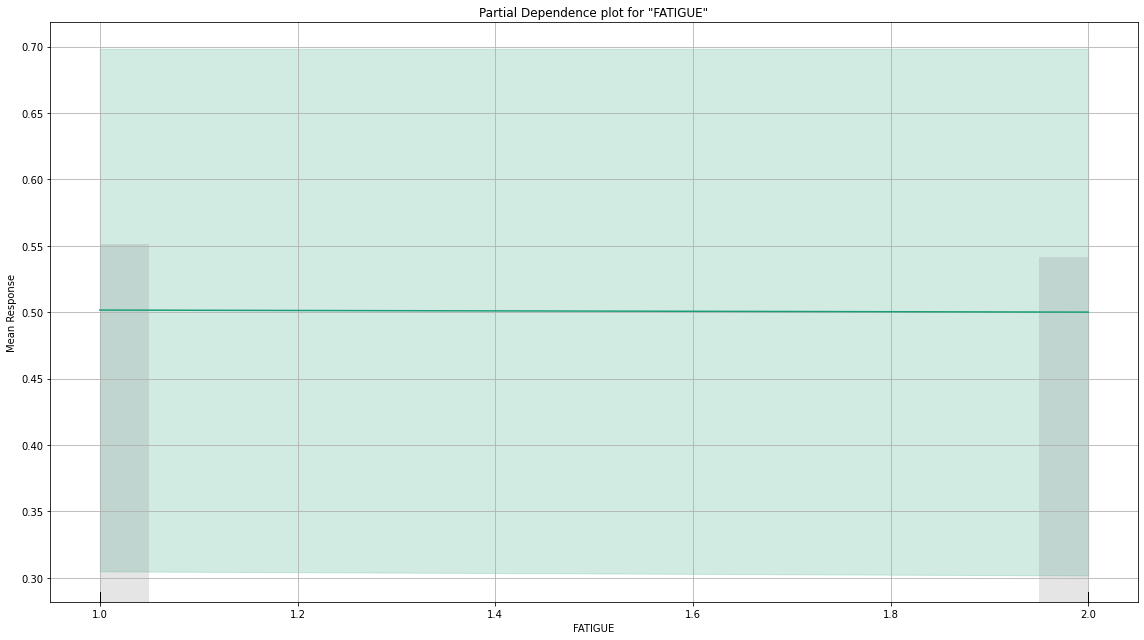

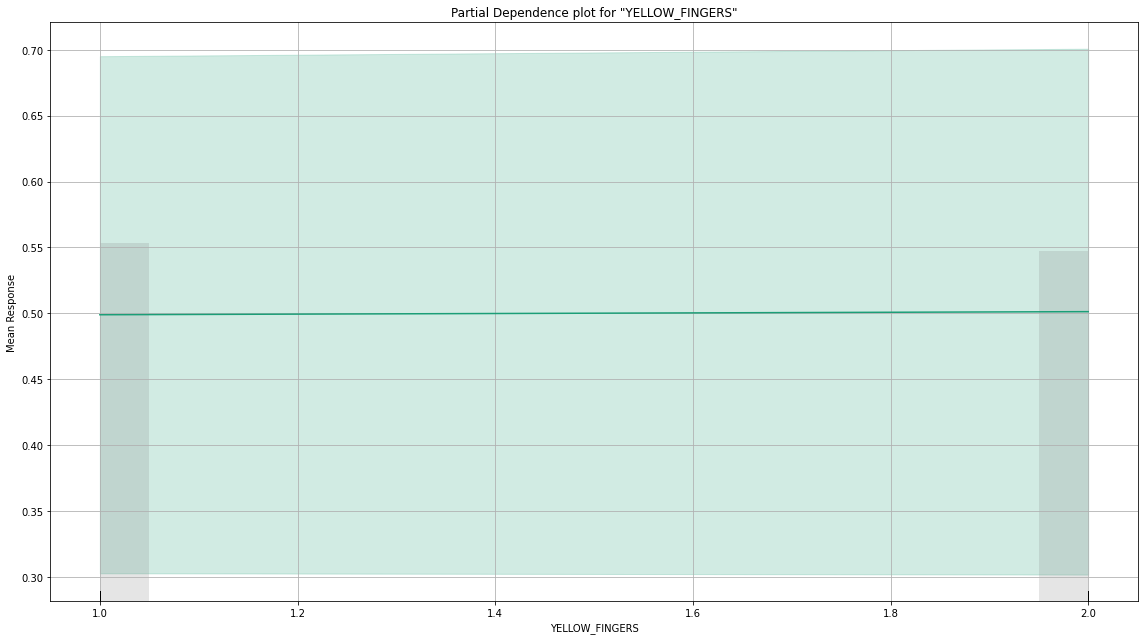

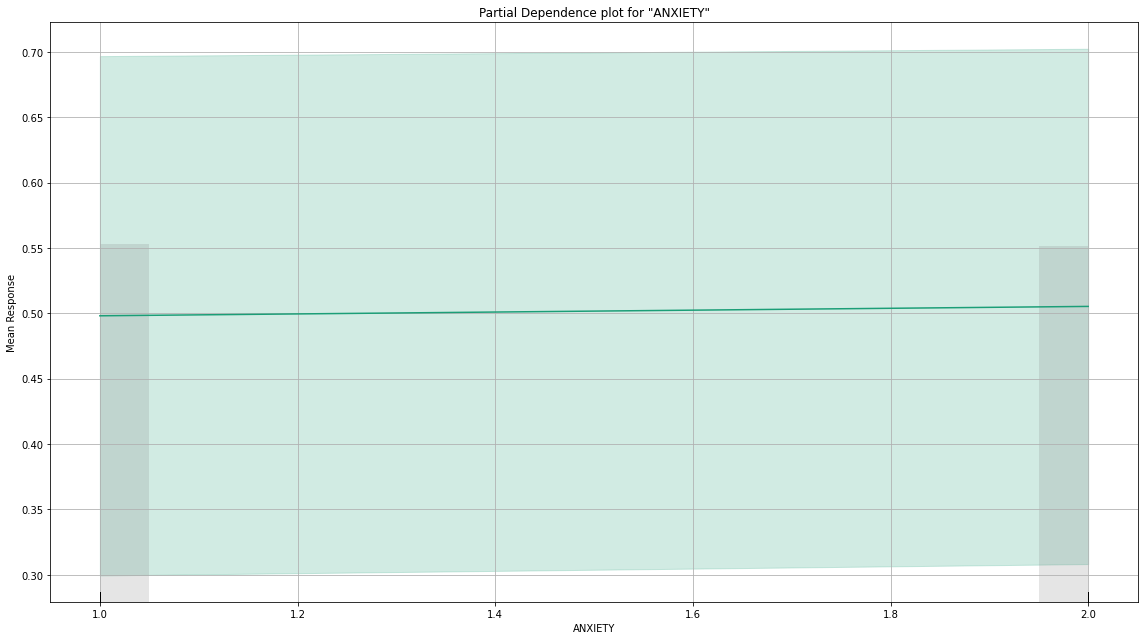

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## DRF_1_AutoML_1_20220214_21635


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.0: 


,,1,2,Error,Rate
0,1,0.0,5646.0,1.0,(5646.0/5646.0)
1,2,0.0,5447.0,0.0,(0.0/5447.0)
2,Total,0.0,11093.0,0.509,(5646.0/11093.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

In [174]:
best_model.explain(df_test)

In [175]:
y_pred=h2o.as_list(predictions)
y_pred[0:5]

,predict,p1,p2
0,2,0.346574,0.653426
1,2,0.919325,0.080675
2,2,0.842402,0.157598
3,2,0.423497,0.576503
4,2,0.461538,0.538462


In [176]:
y_test=h2o.as_list(df_test[y])
y_test[0:5]

,LUNG_CANCER
0,2
1,1
2,1
3,1
4,1


PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%

PartialDependence: Partial Dependence Plot of model DRF_1_AutoML_1_20220214_21635 on column 'GENDER'.


/usr/local/lib/python3.7/dist-packages/h2o/model/model_base.py:1321: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


,gender,mean_response,stddev_response,std_error_mean_response
0,0.0,0.494456,0.252797,0.001074
1,1.0,0.501803,0.250034,0.001062



PartialDependence: Partial Dependence Plot of model DRF_1_AutoML_1_20220214_21635 on column 'AGE'.


,age,mean_response,stddev_response,std_error_mean_response
0,18.000000,0.502006,0.191969,0.000816
1,21.631579,0.508206,0.200672,0.000853
2,25.263158,0.510430,0.202766,0.000862
3,28.894737,0.500853,0.206038,0.000875
4,32.526316,0.497294,0.206502,0.000877
5,36.157895,0.495201,0.207445,0.000881
6,39.789474,0.492810,0.209154,0.000889
7,43.421053,0.498560,0.210071,0.000893
8,47.052632,0.509866,0.210295,0.000894
9,50.684211,0.495424,0.209928,0.000892



PartialDependence: Partial Dependence Plot of model DRF_1_AutoML_1_20220214_21635 on column 'SMOKING'.


,smoking,mean_response,stddev_response,std_error_mean_response
0,1.0,0.496583,0.253663,0.001078
1,2.0,0.499615,0.249586,0.001060



PartialDependence: Partial Dependence Plot of model DRF_1_AutoML_1_20220214_21635 on column 'YELLOW_FINGERS'.


,yellow_fingers,mean_response,stddev_response,std_error_mean_response
0,1.0,0.497847,0.250120,0.001063
1,2.0,0.499024,0.254016,0.001079



PartialDependence: Partial Dependence Plot of model DRF_1_AutoML_1_20220214_21635 on column 'ANXIETY'.


,anxiety,mean_response,stddev_response,std_error_mean_response
0,1.0,0.496361,0.251601,0.001069
1,2.0,0.501998,0.251874,0.001070



PartialDependence: Partial Dependence Plot of model DRF_1_AutoML_1_20220214_21635 on column 'PEER_PRESSURE'.


,peer_pressure,mean_response,stddev_response,std_error_mean_response
0,1.0,0.501352,0.25081,0.001066
1,2.0,0.495439,0.25140,0.001068



PartialDependence: Partial Dependence Plot of model DRF_1_AutoML_1_20220214_21635 on column 'CHRONIC_DISEASE'.


,chronic_disease,mean_response,stddev_response,std_error_mean_response
0,1.0,0.494732,0.241531,0.001026
1,2.0,0.500370,0.260026,0.001105



PartialDependence: Partial Dependence Plot of model DRF_1_AutoML_1_20220214_21635 on column 'FATIGUE'.


,fatigue,mean_response,stddev_response,std_error_mean_response
0,1.0,0.499431,0.251671,0.001069
1,2.0,0.497488,0.252390,0.001072



PartialDependence: Partial Dependence Plot of model DRF_1_AutoML_1_20220214_21635 on column 'ALLERGY'.


,allergy,mean_response,stddev_response,std_error_mean_response
0,1.0,0.498147,0.251347,0.001068
1,2.0,0.498082,0.251578,0.001069



PartialDependence: Partial Dependence Plot of model DRF_1_AutoML_1_20220214_21635 on column 'WHEEZING'.


,wheezing,mean_response,stddev_response,std_error_mean_response
0,1.0,0.500838,0.251412,0.001068
1,2.0,0.494838,0.251222,0.001067



PartialDependence: Partial Dependence Plot of model DRF_1_AutoML_1_20220214_21635 on column 'ALCOHOL_CONSUMING'.


,alcohol_consuming,mean_response,stddev_response,std_error_mean_response
0,1.0,0.497193,0.252988,0.001075
1,2.0,0.498948,0.251886,0.001070



PartialDependence: Partial Dependence Plot of model DRF_1_AutoML_1_20220214_21635 on column 'SHORTNESS_OF_BREATH'.


,shortness_of_breath,mean_response,stddev_response,std_error_mean_response
0,1.0,0.496902,0.250880,0.001066
1,2.0,0.499794,0.252096,0.001071



PartialDependence: Partial Dependence Plot of model DRF_1_AutoML_1_20220214_21635 on column 'SWALLOWING_DIFFICULTY'.


,swallowing_difficulty,mean_response,stddev_response,std_error_mean_response
0,1.0,0.498175,0.251804,0.001070
1,2.0,0.497982,0.251196,0.001067



PartialDependence: Partial Dependence Plot of model DRF_1_AutoML_1_20220214_21635 on column 'CHEST_PAIN'.


,chest_pain,mean_response,stddev_response,std_error_mean_response
0,1.0,0.493438,0.248546,0.001056
1,2.0,0.501812,0.253985,0.001079



PartialDependence: Partial Dependence Plot of model DRF_1_AutoML_1_20220214_21635 on column 'COUGHING'.


,coughing,mean_response,stddev_response,std_error_mean_response
0,1.0,0.498468,0.251510,0.001069
1,2.0,0.497052,0.250778,0.001066


[, , , , , , , , , , , , , , ]

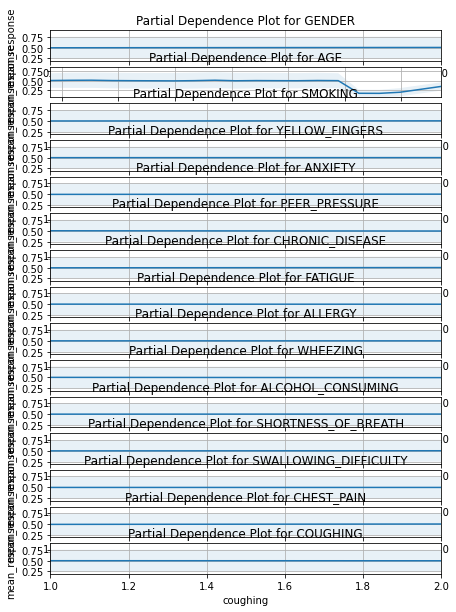

In [177]:
best_model.partial_plot(df, cols=['GENDER','AGE','SMOKING','YELLOW_FINGERS','ANXIETY','PEER_PRESSURE','CHRONIC_DISEASE','FATIGUE','ALLERGY','WHEEZING','ALCOHOL_CONSUMING','SHORTNESS_OF_BREATH','SWALLOWING_DIFFICULTY','CHEST_PAIN','COUGHING',])


In [178]:
#file = files.upload()
cf = pd.read_csv("https://raw.githubusercontent.com/MayurAvinash/DESM_INFO6105/main/surveylungcancer.csv")

2. Are any model assumptions violated?

Ans: Model assumptions for classification are as follows:
•	It assumes that there is minimal or no multicollinearity among the independent variables.
•	It usually requires a large sample size to predict properly.
No model assumptions are violated because no multicollinearity is observed in the model, sample size is large (approx. 55,000).

3. Is there any multicollinearity in the model?

Ans: After observing the correlation matrix, it is concluded that no predictor variable is related to any other predictor variable because the absolute value of correlation coefficient is less than 0.7 for all the predictor variables. Hence, there is no multicollinearity observed in the model.

4. In the multivariate models are predictor variables independent of all the other predictor variables?

Ans: As per the correlation matrix, all predictor variables are independent of all other predictor variables as the absolute value is less than 0.7 for all the predictor variables.

5. In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

Ans: 
As per the variable importance plot, AGE is the most significant predictor variable.
As per the correlation matrix, all predictor variables are independent of all other predictor variables as the absolute value is less than 0.7 for all the predictor variables. Hence, all predictors are independent of each other & hence important for lung cancer prediction.





In [179]:
cf.corr()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
GENDER,1.000000,-0.001740,-0.001729,0.000571,-0.001521,-0.002682,-0.003619,-0.003991,-0.003843,0.002699,-0.008436,0.000032,-0.008383,0.002744,0.004211,0.007253
AGE,-0.001740,1.000000,-0.001042,0.001289,0.002827,-0.000269,0.008720,0.003498,-0.003469,0.001161,-0.003461,-0.000948,-0.003281,0.005846,0.001377,-0.003676
SMOKING,-0.001729,-0.001042,1.000000,0.000571,-0.000901,0.002882,-0.009999,0.002379,0.001556,-0.004981,-0.001844,-0.001615,0.001337,0.009568,-0.002019,-0.003004
YELLOW_FINGERS,0.000571,0.001289,0.000571,1.000000,0.007880,-0.001384,0.001099,-0.004977,0.002917,0.006118,0.003804,-0.003536,0.004272,-0.001950,0.000999,-0.002730
ANXIETY,-0.001521,0.002827,-0.000901,0.007880,1.000000,0.004918,0.001189,-0.003461,-0.004807,-0.002025,-0.002487,-0.008642,-0.001699,0.008629,-0.008886,0.004595
PEER_PRESSURE,-0.002682,-0.000269,0.002882,-0.001384,0.004918,1.000000,0.001819,-0.002229,-0.000481,0.000194,0.003735,-0.001018,-0.002373,0.007726,-0.002398,-0.008138
CHRONIC_DISEASE,-0.003619,0.008720,-0.009999,0.001099,0.001189,0.001819,1.000000,0.003403,0.005661,-0.003398,0.008563,-0.003307,0.006532,-0.001913,-0.001018,0.005324
FATIGUE,-0.003991,0.003498,0.002379,-0.004977,-0.003461,-0.002229,0.003403,1.000000,-0.003956,0.003006,-0.002685,0.000114,0.003906,0.000072,-0.005944,-0.000466
ALLERGY,-0.003843,-0.003469,0.001556,0.002917,-0.004807,-0.000481,0.005661,-0.003956,1.000000,-0.004991,-0.000241,-0.008163,0.001041,-0.005885,-0.003262,-0.001739
WHEEZING,0.002699,0.001161,-0.004981,0.006118,-0.002025,0.000194,-0.003398,0.003006,-0.004991,1.000000,0.006000,0.001567,0.004763,-0.001227,0.002412,0.000305


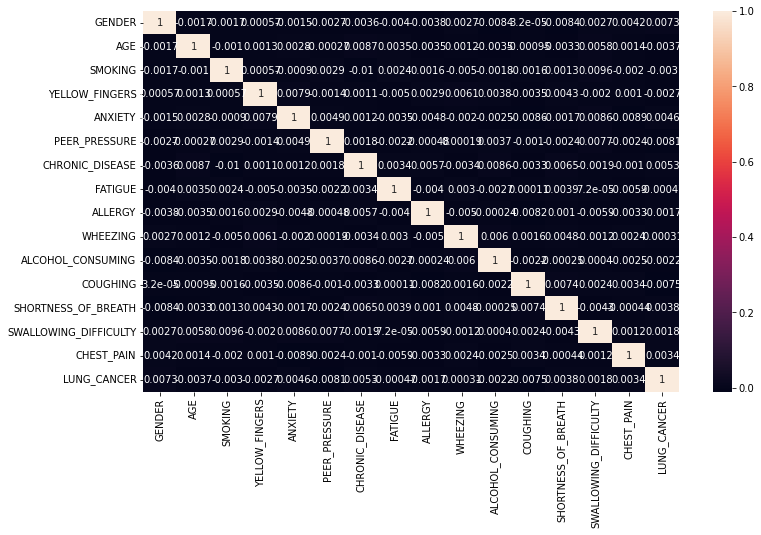

In [180]:
import seaborn as sns
plt.figure(figsize=(12,7))
sns.heatmap(cf.corr(),annot= True)

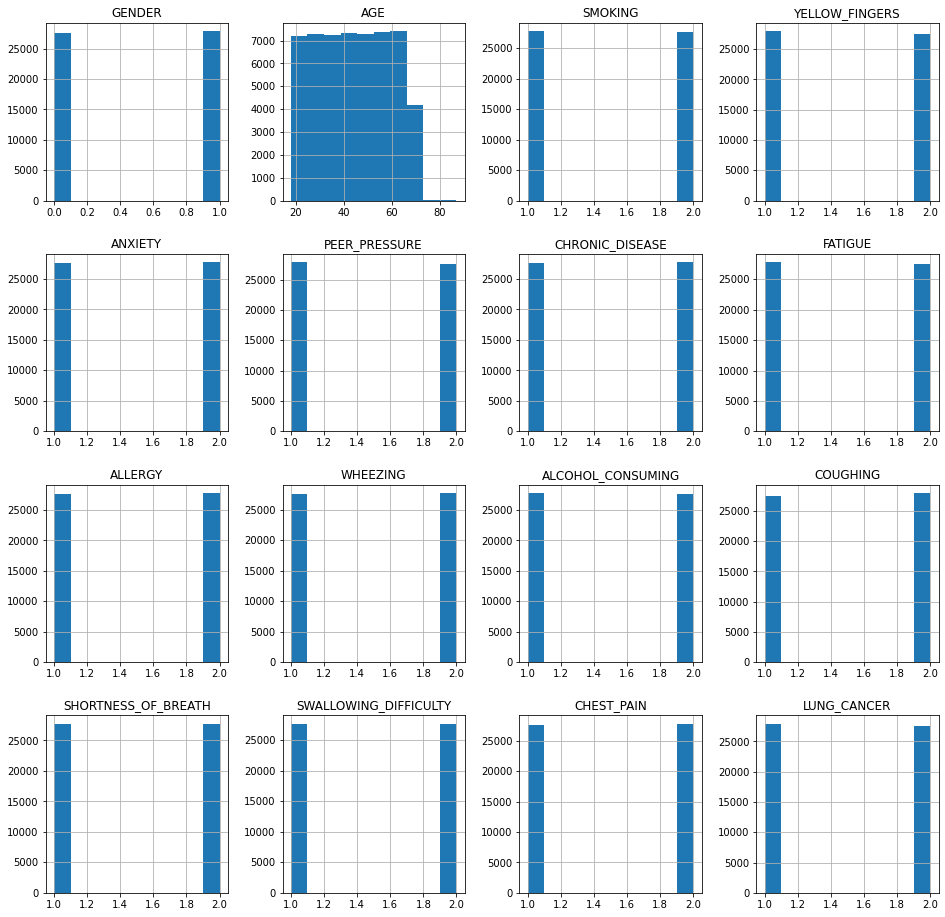

In [181]:
cf.hist(figsize=(16,16))
plt.show()

In [182]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

lungcancer_pval = H2OGeneralizedLinearEstimator(family = 'AUTO', lambda_ = 0, remove_collinear_columns = False, compute_p_values = True)


In [183]:
# set the predictor names and the response column name
predictors = ["GENDER","AGE","SMOKING","YELLOW_FINGERS","ANXIETY","PEER_PRESSURE","CHRONIC_DISEASE","FATIGUE", "ALLERGY", "WHEEZING", "ALCOHOL_CONSUMING", "COUGHING", "SHORTNESS_OF_BREATH", "SWALLOWING_DIFFICULTY", "CHEST_PAIN"]
response = "LUNG_CANCER"

# initialize your estimator
lungcancer_pval.train(x = predictors, y = response, training_frame = df_train, validation_frame = df_test)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1644804947936_1110


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,None,15,15,2,py_177_sid_a6e0




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.24992900913263918
RMSE: 0.49992900409222024
LogLoss: 0.6930051993567762
Null degrees of freedom: 44300
Residual degrees of freedom: 44285
Null deviance: 61413.00102866094
Residual deviance: 61401.64667340907
AIC: 61433.64667340907
AUC: 0.5096554462454985
AUCPR: 0.5051972285223899
Gini: 0.019310892490997045

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4712924874918736: 


,,1,2,Error,Rate
0,1,0.0,22267.0,1.0,(22267.0/22267.0)
1,2,0.0,22034.0,0.0,(0.0/22034.0)
2,Total,0.0,44301.0,0.5026,(22267.0/44301.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.471292,0.664325,399.0
1,max f2,0.471292,0.831867,399.0
2,max f0point5,0.472202,0.552965,398.0
3,max accuracy,0.502140,0.509582,141.0
4,max precision,0.523639,0.666667,0.0
5,max recall,0.471292,1.000000,399.0
6,max specificity,0.523639,0.999955,0.0
7,max absolute_mcc,0.502140,0.018745,141.0
8,max min_per_class_accuracy,0.497436,0.506762,197.0
9,max mean_per_class_accuracy,0.496457,0.508517,208.0



Gains/Lift Table: Avg response rate: 49.74 %, avg score:  3.80 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010022,0.040272,0.914721,0.914721,0.454955,0.040428,0.454955,0.040428,0.009168,0.009168,-8.527914,-8.527914,-0.001700
1,2,0.020022,0.040186,1.043865,0.979220,0.519187,0.040227,0.487035,0.040328,0.010438,0.019606,4.386490,-2.077992,-0.000828
2,3,0.030022,0.040119,0.953094,0.970518,0.474041,0.040152,0.482707,0.040269,0.009531,0.029137,-4.690596,-2.948205,-0.001761
3,4,0.040044,0.040057,1.023401,0.983754,0.509009,0.040086,0.489290,0.040223,0.010257,0.039394,2.340057,-1.624649,-0.001294
4,5,0.050021,0.039995,0.982543,0.983512,0.488688,0.040025,0.489170,0.040184,0.009803,0.049197,-1.745677,-1.648789,-0.001641
5,6,0.100020,0.039672,0.985772,0.984642,0.490293,0.039831,0.489731,0.040007,0.049287,0.098484,-1.422845,-1.535843,-0.003056
6,7,0.150019,0.039371,0.990310,0.986531,0.492551,0.039523,0.490671,0.039846,0.049514,0.147999,-0.968991,-1.346921,-0.004020
7,8,0.200018,0.039091,1.026618,0.996552,0.510609,0.039227,0.495655,0.039691,0.051330,0.199328,2.661844,-0.344843,-0.001372
8,9,0.300016,0.038569,1.008464,1.000522,0.501580,0.038825,0.497630,0.039402,0.100844,0.300172,0.846426,0.052217,0.000312
9,10,0.400014,0.038112,0.999841,1.000352,0.497291,0.038335,0.497545,0.039136,0.099982,0.400154,-0.015897,0.035190,0.000280




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.2499201816739793
RMSE: 0.4999201753019969
LogLoss: 0.6929875005246697
Null degrees of freedom: 11092
Residual degrees of freedom: 11077
Null deviance: 15376.376917231188
Residual deviance: 15374.620686640323
AIC: 15406.620686640323
AUC: 0.5076701510533899
AUCPR: 0.4934877565348518
Gini: 0.015340302106779724

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.47157963433107297: 


,,1,2,Error,Rate
0,1,0.0,5646.0,1.0,(5646.0/5646.0)
1,2,0.0,5447.0,0.0,(0.0/5447.0)
2,Total,0.0,11093.0,0.509,(5646.0/11093.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.471580,0.658646,399.0
1,max f2,0.471580,0.828290,399.0
2,max f0point5,0.476948,0.546962,386.0
3,max accuracy,0.502428,0.509781,133.0
4,max precision,0.518701,0.545455,8.0
5,max recall,0.471580,1.000000,399.0
6,max specificity,0.521630,0.999823,0.0
7,max absolute_mcc,0.488355,0.025200,306.0
8,max min_per_class_accuracy,0.497388,0.504681,195.0
9,max mean_per_class_accuracy,0.494239,0.509430,237.0



Gains/Lift Table: Avg response rate: 49.10 %, avg score:  3.80 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010006,0.040273,0.715539,0.715539,0.351351,0.040449,0.351351,0.040449,0.007160,0.007160,-28.446107,-28.446107,-0.005592
1,2,0.020013,0.040184,0.990746,0.853143,0.486486,0.040230,0.418919,0.040340,0.009914,0.017074,-0.925379,-14.685743,-0.005774
2,3,0.030019,0.040111,1.247606,0.984630,0.612613,0.040147,0.483483,0.040275,0.012484,0.029558,24.760634,-1.536951,-0.000906
3,4,0.040025,0.040050,1.009093,0.990746,0.495495,0.040081,0.486486,0.040227,0.010097,0.039655,0.909336,-0.925379,-0.000728
4,5,0.050032,0.039984,0.917358,0.976068,0.450450,0.040018,0.479279,0.040185,0.009179,0.048834,-8.264240,-2.393151,-0.002352
5,6,0.100063,0.039668,0.946713,0.961391,0.464865,0.039824,0.472072,0.040004,0.047366,0.096200,-5.328696,-3.860924,-0.007591
6,7,0.150005,0.039360,0.974154,0.965640,0.478339,0.039520,0.474159,0.039843,0.048651,0.144850,-2.584571,-3.435984,-0.010127
7,8,0.200036,0.039081,0.983407,0.970084,0.482883,0.039216,0.476341,0.039686,0.049201,0.194052,-1.659265,-2.991604,-0.011758
8,9,0.300009,0.038556,1.021021,0.987058,0.501353,0.038817,0.484675,0.039397,0.102075,0.296126,2.102149,-1.294197,-0.007629
9,10,0.399982,0.038082,1.013676,0.993711,0.497746,0.038309,0.487942,0.039125,0.101340,0.397466,1.367601,-0.628897,-0.004942




Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-02-14 02:31:00,0.000 sec,0,30706.500514,0.693133,,,,,,,,,,,,,,
1,,2022-02-14 02:31:01,0.106 sec,1,30700.823337,0.693005,,,,,,,,,,,,,,
2,,2022-02-14 02:31:01,0.154 sec,2,30700.823337,0.693005,0.499929,0.693005,0.000256,0.509655,0.505197,0.914721,0.50263,0.49992,0.692988,-0.000003,0.50767,0.493488,0.715539,0.50897



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,COUGHING,0.014782,1.000000,0.148127
1,GENDER,0.012452,0.842392,0.124781
2,CHEST_PAIN,0.011598,0.784657,0.116229
3,PEER_PRESSURE,0.011589,0.784046,0.116138
4,CHRONIC_DISEASE,0.011318,0.765712,0.113422
5,AGE,0.009776,0.661342,0.097962
6,ANXIETY,0.009582,0.648225,0.096019
7,SHORTNESS_OF_BREATH,0.006214,0.420405,0.062273
8,WHEEZING,0.004328,0.292774,0.043368
9,FATIGUE,0.002499,0.169035,0.025039


In [184]:
# print the auc for the validation data
print(lungcancer_pval.auc(valid=True))

0.5076701510533899


In [185]:
# take a look at the coefficients_table to see the p_values
coeff_table = lungcancer_pval._model_json['output']['coefficients_table']

1. Is the relationship significant?

Ans: As shown in the table below, p-values for all the independent variables is greater than 0.05, hence the relationship is statistically insignificant.

8. Which independent variables are significant?

Ans: As none of the independent variables have p-value less than 0.05, all independent variables are insignificant.



In [186]:
# convert table to a pandas dataframe
coeff_table.as_data_frame()

,names,coefficients,std_error,z_value,p_value,standardized_coefficients
0,Intercept,-0.027035,0.106959,-0.252758,0.800455,-0.010522
1,GENDER,0.024904,0.019009,1.310067,0.190173,0.012452
2,AGE,-0.000638,0.000620,-1.028535,0.303698,-0.009776
3,SMOKING,0.003282,0.019009,0.172631,0.862941,0.001641
4,YELLOW_FINGERS,-0.000544,0.019009,-0.028639,0.977152,-0.000272
5,ANXIETY,0.019163,0.019010,1.008048,0.313431,0.009582
6,PEER_PRESSURE,-0.023179,0.019010,-1.219321,0.222722,-0.011589
7,CHRONIC_DISEASE,0.022637,0.019012,1.190678,0.233780,0.011318
8,FATIGUE,0.004997,0.019009,0.262882,0.792641,0.002499
9,ALLERGY,-0.004794,0.019009,-0.252175,0.800906,-0.002397


7. Does regularization help?

Ans:
Yes, regularization does help. 
With model regularization, the difference in error values for train and test data is relatively small, whereas the difference in error values for unregularized data is much larger. As a result, regularization aids in overcoming overfitting.


In [187]:
lungcancer_regularization = H2OGeneralizedLinearEstimator(family = 'AUTO', lambda_ = .1, alpha = 0)

In [188]:
lungcancer_regularization.train(x = X, y = y, training_frame = df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1644804947936_1113


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,Ridge ( lambda = 0.1 ),15,15,2,py_177_sid_a6e0




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.2499342900123137
RMSE: 0.4999342856939437
LogLoss: 0.6930157548942676
Null degrees of freedom: 44300
Residual degrees of freedom: 44285
Null deviance: 61413.00102866094
Residual deviance: 61402.5819151419
AIC: 61434.5819151419
AUC: 0.5096725160977267
AUCPR: 0.5051795465017251
Gini: 0.01934503219545336

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.47878362645156636: 


,,1,2,Error,Rate
0,1,0.0,22267.0,1.0,(22267.0/22267.0)
1,2,0.0,22034.0,0.0,(0.0/22034.0)
2,Total,0.0,44301.0,0.5026,(22267.0/44301.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.478784,0.664325,399.0
1,max f2,0.478784,0.831867,399.0
2,max f0point5,0.479422,0.552965,398.0
3,max accuracy,0.500765,0.509830,143.0
4,max precision,0.516086,0.666667,0.0
5,max recall,0.478784,1.000000,399.0
6,max specificity,0.516086,0.999955,0.0
7,max absolute_mcc,0.500765,0.019293,143.0
8,max min_per_class_accuracy,0.497381,0.506085,200.0
9,max mean_per_class_accuracy,0.500765,0.508687,143.0



Gains/Lift Table: Avg response rate: 49.74 %, avg score: 49.74 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010022,0.510190,1.046042,1.046042,0.520270,0.511721,0.520270,0.511721,0.010484,0.010484,4.604217,4.604217,0.000918
1,2,0.020022,0.508955,0.971248,1.008687,0.483070,0.509492,0.501691,0.510608,0.009712,0.020196,-2.875179,0.868735,0.000346
2,3,0.030022,0.508089,1.039326,1.018893,0.516930,0.508520,0.506767,0.509912,0.010393,0.030589,3.932636,1.889268,0.001128
3,4,0.040022,0.507402,1.003018,1.014926,0.498871,0.507725,0.504794,0.509366,0.010030,0.040619,0.301801,1.492625,0.001188
4,5,0.050021,0.506770,1.043865,1.020711,0.519187,0.507071,0.507671,0.508907,0.010438,0.051057,4.386490,2.071137,0.002061
5,6,0.100020,0.504804,1.025711,1.023210,0.510158,0.505694,0.508914,0.507301,0.051284,0.102342,2.571073,2.321048,0.004619
6,7,0.150019,0.503416,1.047496,1.031304,0.520993,0.504088,0.512940,0.506230,0.052374,0.154715,4.749573,3.130435,0.009343
7,8,0.200018,0.502297,1.027526,1.030360,0.511061,0.502843,0.512470,0.505383,0.051375,0.206091,2.752614,3.035990,0.012082
8,9,0.300016,0.500450,1.013911,1.024877,0.504289,0.501326,0.509743,0.504031,0.101389,0.307479,1.391052,2.487719,0.014849
9,10,0.400014,0.498857,1.005287,1.019980,0.500000,0.499640,0.507308,0.502933,0.100526,0.408006,0.528728,1.997999,0.015901




Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-02-14 02:31:32,0.000 sec,0,30706.500514,0.693133,,,,,,,
1,,2022-02-14 02:31:32,0.064 sec,1,30701.291156,0.693042,,,,,,,
2,,2022-02-14 02:31:33,0.089 sec,2,30701.290958,0.693042,0.499934,0.693016,0.000235,0.509673,0.50518,1.046042,0.50263



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,COUGHING,0.010552,1.000000,0.148391
1,GENDER,0.008892,0.842641,0.125040
2,PEER_PRESSURE,0.008271,0.783827,0.116313
3,CHEST_PAIN,0.008264,0.783178,0.116217
4,CHRONIC_DISEASE,0.008075,0.765198,0.113549
5,AGE,0.006950,0.658642,0.097737
6,ANXIETY,0.006818,0.646157,0.095884
7,SHORTNESS_OF_BREATH,0.004402,0.417174,0.061905
8,WHEEZING,0.003099,0.293718,0.043585
9,FATIGUE,0.001799,0.170489,0.025299


In [190]:
lungcancer_regularization.train(x = X, y = y, training_frame = df_test)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1644804947936_1117


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,Ridge ( lambda = 0.1 ),15,15,2,py_178_sid_a6e0




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.24955970961125867
RMSE: 0.4995595155847386
LogLoss: 0.6922657305092721
Null degrees of freedom: 11092
Residual degrees of freedom: 11077
Null deviance: 15374.593247450826
Residual deviance: 15358.60749707871
AIC: 15390.60749707871
AUC: 0.5212130795575514
AUCPR: 0.5086074393121833
Gini: 0.042426159115102724

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.446356378527077: 


,,1,2,Error,Rate
0,1,0.0,5646.0,1.0,(5646.0/5646.0)
1,2,0.0,5447.0,0.0,(0.0/5447.0)
2,Total,0.0,11093.0,0.509,(5646.0/11093.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.446356,0.658646,399.0
1,max f2,0.446356,0.828290,399.0
2,max f0point5,0.465683,0.547917,358.0
3,max accuracy,0.503754,0.519968,111.0
4,max precision,0.535872,1.000000,0.0
5,max recall,0.446356,1.000000,399.0
6,max specificity,0.535872,1.000000,0.0
7,max absolute_mcc,0.475654,0.042667,309.0
8,max min_per_class_accuracy,0.491107,0.511474,203.0
9,max mean_per_class_accuracy,0.485080,0.515030,246.0



Gains/Lift Table: Avg response rate: 49.10 %, avg score: 49.10 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010006,0.522954,1.100829,1.100829,0.540541,0.527051,0.540541,0.527051,0.011015,0.011015,10.082912,10.082912,0.001982
1,2,0.020013,0.519566,1.045788,1.073308,0.513514,0.521050,0.527027,0.524051,0.010464,0.021480,4.578766,7.330839,0.002882
2,3,0.030019,0.517547,1.100829,1.082482,0.540541,0.518455,0.531532,0.522185,0.011015,0.032495,10.082912,8.248197,0.004865
3,4,0.040025,0.515821,0.972399,1.054961,0.477477,0.516566,0.518018,0.520781,0.009730,0.042225,-2.760094,5.496124,0.004322
4,5,0.050032,0.513931,1.229259,1.089821,0.603604,0.514809,0.535135,0.519586,0.012300,0.054525,22.925918,8.982083,0.008829
5,6,0.100063,0.509387,1.042118,1.065970,0.511712,0.511519,0.523423,0.515553,0.052139,0.106664,4.211823,6.596953,0.012970
6,7,0.150005,0.506037,1.084436,1.072118,0.532491,0.507647,0.526442,0.512921,0.054158,0.160822,8.443591,7.211759,0.021255
7,8,0.200036,0.503265,1.064135,1.070121,0.522523,0.504639,0.525462,0.510849,0.053240,0.214063,6.413482,7.012100,0.027559
8,9,0.300009,0.498820,0.971440,1.037237,0.477006,0.500942,0.509315,0.507548,0.097118,0.311180,-2.856049,3.723705,0.021949
9,10,0.399982,0.494908,1.017349,1.032266,0.499549,0.496842,0.506874,0.504872,0.101707,0.412888,1.734875,3.226610,0.025357




Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-02-14 02:33:19,0.000 sec,0,7687.296624,0.692986,,,,,,,
1,,2022-02-14 02:33:19,0.018 sec,1,7679.305607,0.692426,,,,,,,
2,,2022-02-14 02:33:19,0.029 sec,2,7679.303749,0.692426,0.49956,0.692266,0.00144,0.521213,0.508607,1.100829,0.50897



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,SMOKING,0.025575,1.000000,0.133214
1,PEER_PRESSURE,0.025114,0.981957,0.130810
2,YELLOW_FINGERS,0.019883,0.777437,0.103566
3,ALCOHOL_CONSUMING,0.019406,0.758770,0.101079
4,GENDER,0.016004,0.625771,0.083361
5,WHEEZING,0.014315,0.559732,0.074564
6,SWALLOWING_DIFFICULTY,0.013446,0.525738,0.070036
7,COUGHING,0.011117,0.434674,0.057905
8,FATIGUE,0.010713,0.418875,0.055800
9,SHORTNESS_OF_BREATH,0.009854,0.385296,0.051327


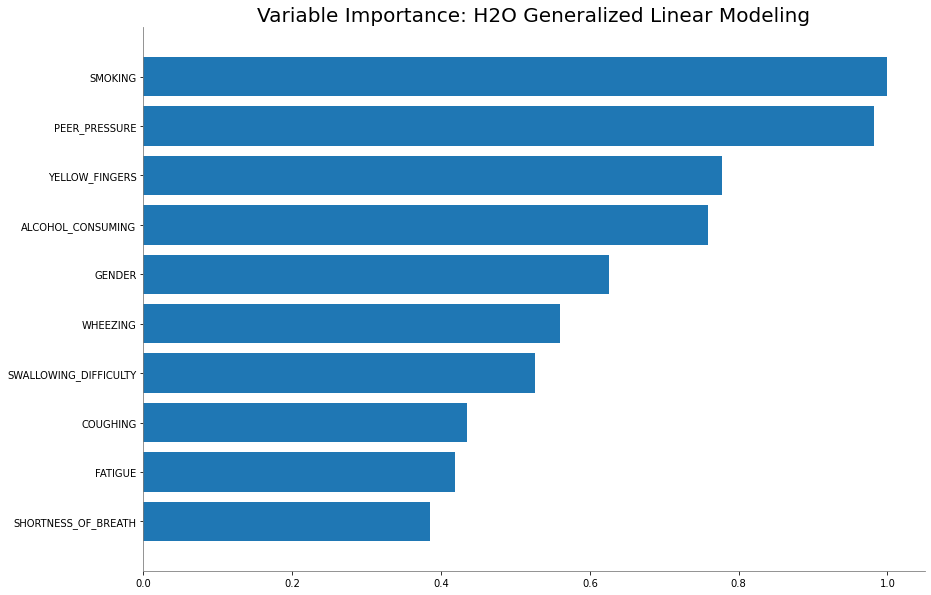

<Figure size 432x288 with 0 Axes>

In [191]:
lungcancer_regularization.varimp_plot()

9. Which hyperparameters are important?

Ans:

The hyperparameters which are available for DRF model are number_of_trees, number_of_internal_trees, model_size_in_bytes, min_depth, max_depth, mean_depth, min_leaves, max_leaves and mean_leaves. 
Firstly, tuning without defining any hyperparameter gives accuracy as 0.5019. Then, after defining ntrees, sample_rate, max_depth as hyperparameters for DRF model increases accuracy to 0.5027. Moreover, further increasing ntrees and max_depth to 100, 25 respectively increases accuracy to 0.5062. Further altering hyperparameters  ntrees and max_depth to 150, 30 respectively does not increases the accuracy.


In [204]:
drf_model = H2ORandomForestEstimator()
drf_model.train(x = X, y = y, training_frame=df_train)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1644804947936_1272


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,7815493.0,20.0,20.0,18.4,1.0,14288.0,12467.32




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.28079496341161053
RMSE: 0.5299008996138905
LogLoss: 0.7790335696754505
Mean Per-Class Error: 0.5
AUC: 0.5019816957049753
AUCPR: 0.4946181263795759
Gini: 0.003963391409950612
Could not find exact threshold 0.0; using closest threshold found 0.0.
Could not find exact threshold 0.0; using closest threshold found 0.0.

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.0: 


,,1,2,Error,Rate
0,1,0.0,22267.0,1.0,(22267.0/22267.0)
1,2,0.0,22034.0,0.0,(0.0/22034.0)
2,Total,0.0,44301.0,0.5026,(22267.0/44301.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.000000,0.664325,399.0
1,max f2,0.000000,0.831867,399.0
2,max f0point5,0.000000,0.552957,399.0
3,max accuracy,0.356769,0.504910,277.0
4,max precision,0.356769,0.501466,277.0
5,max recall,0.000000,1.000000,399.0
6,max specificity,1.000000,0.999865,0.0
7,max absolute_mcc,0.226923,0.018978,339.0
8,max min_per_class_accuracy,0.499811,0.497232,199.0
9,max mean_per_class_accuracy,0.356769,0.506370,277.0



Gains/Lift Table: Avg response rate: 49.74 %, avg score: 49.80 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010022,0.888293,0.896608,0.896608,0.445946,0.918262,0.445946,0.918262,0.008986,0.008986,-10.339242,-10.339242,-0.002062
1,2,0.020135,0.852477,0.973872,0.935413,0.484375,0.867142,0.465247,0.892588,0.009848,0.018835,-2.612794,-6.458694,-0.002587
2,3,0.030090,0.825858,1.025803,0.965317,0.510204,0.839377,0.480120,0.874984,0.010211,0.029046,2.580335,-3.468288,-0.002076
3,4,0.040586,0.807490,1.020421,0.979568,0.507527,0.816739,0.487208,0.859920,0.010711,0.039757,2.042064,-2.043197,-0.001650
4,5,0.050179,0.789335,0.917768,0.967753,0.456471,0.798303,0.481332,0.848140,0.008805,0.048561,-8.223184,-3.224706,-0.003219
5,6,0.100043,0.732983,0.972976,0.970356,0.483929,0.758268,0.482626,0.803346,0.048516,0.097077,-2.702390,-2.964373,-0.005900
6,7,0.150019,0.689241,1.003471,0.981388,0.499097,0.709849,0.488113,0.772199,0.050150,0.147227,0.347105,-1.861211,-0.005555
7,8,0.200063,0.655904,1.013903,0.989521,0.504285,0.671148,0.492158,0.746922,0.050740,0.197967,1.390274,-1.047882,-0.004171
8,9,0.300016,0.598406,0.993028,0.990689,0.493902,0.625340,0.492739,0.706416,0.099256,0.297222,-0.697232,-0.931060,-0.005557
9,10,0.400262,0.547243,1.019548,0.997917,0.507093,0.571354,0.496334,0.672589,0.102206,0.399428,1.954828,-0.208286,-0.001659




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-02-14 02:56:07,0.018 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2022-02-14 02:56:07,0.212 sec,1.0,0.605960,8.613345,0.507187,0.505368,1.028214,0.500679
2,,2022-02-14 02:56:07,0.631 sec,2.0,0.640804,10.976072,0.503803,0.502063,1.015231,0.501227
3,,2022-02-14 02:56:08,1.003 sec,3.0,0.636036,10.251821,0.500999,0.499138,1.004135,0.501708
4,,2022-02-14 02:56:08,1.401 sec,4.0,0.630394,9.588703,0.501449,0.498241,1.000669,0.502445
5,,2022-02-14 02:56:08,1.772 sec,5.0,0.621238,8.669353,0.502544,0.498739,1.002360,0.502423
6,,2022-02-14 02:56:09,2.186 sec,6.0,0.611965,7.775150,0.505123,0.500796,1.011682,0.502678
7,,2022-02-14 02:56:09,2.577 sec,7.0,0.603757,6.901589,0.503085,0.498217,0.996790,0.502710
8,,2022-02-14 02:56:10,2.852 sec,8.0,0.595440,6.067901,0.503557,0.498312,0.998772,0.502870
9,,2022-02-14 02:56:10,3.037 sec,9.0,0.589109,5.400307,0.503616,0.499642,1.009851,0.502521



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,AGE,139986.046875,1.000000,0.466585
1,WHEEZING,12580.475586,0.089869,0.041932
2,ALLERGY,12575.464844,0.089834,0.041915
3,FATIGUE,12519.642578,0.089435,0.041729
4,SWALLOWING_DIFFICULTY,12376.972656,0.088416,0.041253
5,SHORTNESS_OF_BREATH,12297.714844,0.087850,0.040989
6,SMOKING,12164.330078,0.086897,0.040545
7,CHRONIC_DISEASE,12133.688477,0.086678,0.040443
8,ALCOHOL_CONSUMING,11653.064453,0.083244,0.038841
9,ANXIETY,11439.892578,0.081722,0.038130


In [205]:
drf_model1 = H2ORandomForestEstimator(ntrees=50, sample_rate= 0.1, max_depth=20)
drf_model1.train(x = X, y = y, training_frame=df_train)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1644804947936_1289


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,1215448.0,18.0,20.0,15.9,1.0,2321.0,1934.54




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.2561016312300017
RMSE: 0.5060648488385671
LogLoss: 0.7058653372816074
Mean Per-Class Error: 0.5
AUC: 0.5027307982720165
AUCPR: 0.5009664006402861
Gini: 0.005461596544032998

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.19964930216471355: 


,,1,2,Error,Rate
0,1,0.0,22267.0,1.0,(22267.0/22267.0)
1,2,0.0,22034.0,0.0,(0.0/22034.0)
2,Total,0.0,44301.0,0.5026,(22267.0/44301.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.199649,0.664325,399.0
1,max f2,0.199649,0.831867,399.0
2,max f0point5,0.271765,0.553078,387.0
3,max accuracy,0.581089,0.505880,109.0
4,max precision,0.784288,0.666667,3.0
5,max recall,0.199649,1.000000,399.0
6,max specificity,0.813587,0.999955,0.0
7,max absolute_mcc,0.727382,0.011321,15.0
8,max min_per_class_accuracy,0.499630,0.493511,199.0
9,max mean_per_class_accuracy,0.530200,0.504138,162.0



Gains/Lift Table: Avg response rate: 49.74 %, avg score: 49.68 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010226,0.684382,0.994191,0.994191,0.494481,0.707942,0.494481,0.707942,0.010166,0.010166,-0.580860,-0.580860,-0.000118
1,2,0.020677,0.662643,1.063911,1.029432,0.529158,0.671384,0.512009,0.689464,0.011119,0.021285,6.391095,2.943174,0.001211
2,3,0.030090,0.650796,1.012520,1.024141,0.503597,0.655758,0.509377,0.678920,0.009531,0.030816,1.251957,2.414113,0.001445
3,4,0.040022,0.639290,1.037274,1.027400,0.515909,0.644787,0.510998,0.670449,0.010302,0.041118,3.727370,2.740020,0.002182
4,5,0.050202,0.630514,0.967394,1.015232,0.481153,0.635116,0.504946,0.663284,0.009848,0.050967,-3.260603,1.523167,0.001521
5,6,0.100223,0.599708,1.031599,1.023401,0.513087,0.614057,0.509009,0.638715,0.051602,0.102569,3.159895,2.340057,0.004666
6,7,0.150019,0.581028,1.030807,1.025859,0.512693,0.590185,0.510232,0.622606,0.051330,0.153899,3.080682,2.585892,0.007718
7,8,0.202862,0.564874,0.979092,1.013677,0.486971,0.571955,0.504173,0.609412,0.051738,0.205637,-2.090773,1.367680,0.005520
8,9,0.300129,0.541248,0.999455,1.009068,0.497099,0.551686,0.501880,0.590704,0.097213,0.302850,-0.054520,0.906770,0.005414
9,10,0.400036,0.519528,0.991205,1.004607,0.492996,0.527857,0.499661,0.575008,0.099029,0.401879,-0.879492,0.460658,0.003666




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-02-14 02:56:17,0.003 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2022-02-14 02:56:17,0.086 sec,1.0,0.702047,16.896521,0.503379,0.500220,1.007815,0.502132
2,,2022-02-14 02:56:17,0.166 sec,2.0,0.628399,10.182994,0.499787,0.497680,1.002740,0.502599
3,,2022-02-14 02:56:18,0.247 sec,3.0,0.587279,5.943533,0.502133,0.499423,1.010752,0.502609
4,,2022-02-14 02:56:18,0.382 sec,4.0,0.565744,3.619172,0.502476,0.499880,1.011123,0.502630
5,,2022-02-14 02:56:18,0.470 sec,5.0,0.553197,2.386930,0.503731,0.501060,1.012679,0.502619
6,,2022-02-14 02:56:18,0.555 sec,6.0,0.544468,1.682451,0.504424,0.501341,1.011108,0.502619
7,,2022-02-14 02:56:18,0.647 sec,7.0,0.538598,1.251344,0.502481,0.499844,1.066072,0.502630
8,,2022-02-14 02:56:18,0.739 sec,8.0,0.534375,1.035153,0.502227,0.499778,1.015716,0.502630
9,,2022-02-14 02:56:18,0.825 sec,9.0,0.531099,0.921043,0.501521,0.499795,1.021828,0.502630



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,AGE,17158.976562,1.000000,0.366456
1,YELLOW_FINGERS,2372.276611,0.138253,0.050664
2,SWALLOWING_DIFFICULTY,2343.540039,0.136578,0.050050
3,SHORTNESS_OF_BREATH,2333.980713,0.136021,0.049846
4,WHEEZING,2256.703857,0.131517,0.048195
5,ANXIETY,2236.094971,0.130316,0.047755
6,ALCOHOL_CONSUMING,2234.776123,0.130239,0.047727
7,FATIGUE,2231.158447,0.130029,0.047650
8,GENDER,2226.031494,0.129730,0.047540
9,ALLERGY,2133.950928,0.124364,0.045574


In [206]:
drf_model2 = H2ORandomForestEstimator(ntrees=100, sample_rate= 0.1, max_depth=25)
drf_model2.train(x = X, y = y, training_frame=df_train)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1644804947936_1326


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,100.0,100.0,2538578.0,17.0,22.0,16.57,1.0,2358.0,2020.58




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.2537793630975899
RMSE: 0.5037651864684477
LogLoss: 0.7009341497566483
Mean Per-Class Error: 0.49993263573898594
AUC: 0.5062203112212961
AUCPR: 0.5003091791873447
Gini: 0.012440622442592142

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.21564015475186438: 


,,1,2,Error,Rate
0,1,3.0,22264.0,0.9999,(22264.0/22267.0)
1,2,0.0,22034.0,0.0,(0.0/22034.0)
2,Total,3.0,44298.0,0.5026,(22264.0/44301.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.215640,0.664355,397.0
1,max f2,0.215640,0.831886,397.0
2,max f0point5,0.342364,0.553208,365.0
3,max accuracy,0.516090,0.505677,179.0
4,max precision,0.755008,1.000000,0.0
5,max recall,0.215640,1.000000,397.0
6,max specificity,0.755008,1.000000,0.0
7,max absolute_mcc,0.369152,0.017823,348.0
8,max min_per_class_accuracy,0.499730,0.501010,195.0
9,max mean_per_class_accuracy,0.461619,0.506676,246.0



Gains/Lift Table: Avg response rate: 49.74 %, avg score: 49.81 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010113,0.653140,0.978360,0.978360,0.486607,0.676742,0.486607,0.676742,0.009894,0.009894,-2.164005,-2.164005,-0.000435
1,2,0.020022,0.636468,1.053376,1.015487,0.523918,0.643690,0.505073,0.660384,0.010438,0.020332,5.337620,1.548749,0.000617
2,3,0.030022,0.624755,0.984864,1.005287,0.489842,0.630534,0.500000,0.650441,0.009848,0.030181,-1.513616,0.528728,0.000316
3,4,0.040202,0.616374,0.913898,0.982145,0.454545,0.620450,0.488490,0.642847,0.009304,0.039484,-8.610247,-1.785521,-0.001428
4,5,0.050021,0.609579,0.989110,0.983512,0.491954,0.612564,0.489170,0.636902,0.009712,0.049197,-1.088975,-1.648789,-0.001641
5,6,0.100020,0.584960,1.040234,1.011867,0.517381,0.596205,0.503272,0.616558,0.052011,0.101207,4.023406,1.186669,0.002361
6,7,0.150019,0.568226,0.999387,1.007707,0.497065,0.576484,0.501204,0.603202,0.049968,0.151175,-0.061282,0.770748,0.002300
7,8,0.200176,0.555263,1.002573,1.006421,0.498650,0.561233,0.500564,0.592686,0.050286,0.201461,0.257274,0.642090,0.002557
8,9,0.300648,0.533442,0.999189,1.004004,0.496967,0.543824,0.499362,0.576357,0.100390,0.301852,-0.081084,0.400416,0.002395
9,10,0.401029,0.516018,1.037614,1.012417,0.516078,0.524192,0.503546,0.563300,0.104157,0.406009,3.761381,1.241698,0.009907




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-02-14 02:58:47,0.007 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2022-02-14 02:58:47,0.029 sec,1.0,0.499992,0.693132,0.500000,0.497251,0.999761,0.502749
2,,2022-02-14 02:58:47,0.110 sec,2.0,0.568656,2.302100,0.500335,0.498205,1.011786,0.502418
3,,2022-02-14 02:58:47,0.247 sec,3.0,0.559324,1.738338,0.503378,0.502667,1.057949,0.502576
4,,2022-02-14 02:58:47,0.457 sec,4.0,0.549295,1.292025,0.504932,0.504034,1.093570,0.502619
5,,2022-02-14 02:58:47,0.663 sec,5.0,0.542274,1.072847,0.506056,0.504549,1.060674,0.502619
6,,2022-02-14 02:58:47,0.859 sec,6.0,0.537709,0.947421,0.505051,0.502140,1.032765,0.502630
7,,2022-02-14 02:58:48,1.012 sec,7.0,0.533370,0.863405,0.503635,0.499976,1.034246,0.502630
8,,2022-02-14 02:58:48,1.066 sec,8.0,0.525601,0.770658,0.503689,0.500159,1.010644,0.502630
9,,2022-02-14 02:58:48,1.225 sec,9.0,0.524197,0.762776,0.502238,0.498390,0.982526,0.502630



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,AGE,36077.046875,1.000000,0.367982
1,ALCOHOL_CONSUMING,4808.199707,0.133276,0.049043
2,YELLOW_FINGERS,4781.230469,0.132528,0.048768
3,SHORTNESS_OF_BREATH,4755.252441,0.131808,0.048503
4,WHEEZING,4748.971680,0.131634,0.048439
5,ALLERGY,4731.106934,0.131139,0.048257
6,SWALLOWING_DIFFICULTY,4713.875000,0.130661,0.048081
7,SMOKING,4659.453613,0.129153,0.047526
8,FATIGUE,4430.540039,0.122808,0.045191
9,GENDER,4236.862305,0.117439,0.043216


In [209]:
drf_model3 = H2ORandomForestEstimator(ntrees=150, sample_rate= 0.1, max_depth=30)
drf_model3.train(x = X, y = y, training_frame=df_train)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1644804947936_1428


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,150.0,150.0,3700440.0,17.0,22.0,16.073334,1.0,2348.0,1963.5533




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.2533269440681021
RMSE: 0.503315948553294
LogLoss: 0.6999384352682977
Mean Per-Class Error: 0.49930580223048976
AUC: 0.5015668789330137
AUCPR: 0.49824641368524925
Gini: 0.00313375786602732

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.316511604093173: 


,,1,2,Error,Rate
0,1,39.0,22228.0,0.9982,(22228.0/22267.0)
1,2,8.0,22026.0,0.0004,(8.0/22034.0)
2,Total,47.0,44254.0,0.5019,(22236.0/44301.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.316512,0.664555,389.0
1,max f2,0.285848,0.831936,394.0
2,max f0point5,0.326587,0.553366,386.0
3,max accuracy,0.560881,0.504255,107.0
4,max precision,0.684531,0.586207,8.0
5,max recall,0.285848,1.000000,394.0
6,max specificity,0.769766,0.999955,0.0
7,max absolute_mcc,0.326587,0.021830,386.0
8,max min_per_class_accuracy,0.497230,0.499228,199.0
9,max mean_per_class_accuracy,0.481562,0.503248,219.0



Gains/Lift Table: Avg response rate: 49.74 %, avg score: 49.68 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010022,0.633753,0.991702,0.991702,0.493243,0.653084,0.493243,0.653084,0.009939,0.009939,-0.829768,-0.829768,-0.000165
1,2,0.020022,0.617468,0.957633,0.974687,0.476298,0.624857,0.484780,0.638986,0.009576,0.019515,-4.236742,-2.531334,-0.001008
2,3,0.030022,0.607875,1.003018,0.984123,0.498871,0.612303,0.489474,0.630099,0.010030,0.029545,0.301801,-1.587666,-0.000948
3,4,0.040022,0.600429,0.993941,0.986576,0.494357,0.603863,0.490694,0.623543,0.009939,0.039484,-0.605907,-1.342365,-0.001069
4,5,0.050021,0.594305,0.980325,0.985327,0.487585,0.597193,0.490072,0.618276,0.009803,0.049287,-1.967470,-1.467329,-0.001460
5,6,0.100065,0.573599,1.022972,1.004153,0.508796,0.583169,0.499436,0.600718,0.051194,0.100481,2.297163,0.415342,0.000827
6,7,0.150019,0.558572,1.030272,1.012850,0.512427,0.565811,0.503762,0.589095,0.051466,0.151947,3.027183,1.285038,0.003835
7,8,0.200018,0.547138,1.003018,1.010393,0.498871,0.552670,0.502539,0.579990,0.050150,0.202097,0.301801,1.039257,0.004136
8,9,0.300061,0.528681,0.980790,1.000523,0.487816,0.537276,0.497630,0.565749,0.098121,0.300218,-1.920979,0.052289,0.000312
9,10,0.400014,0.511459,1.000747,1.000579,0.497742,0.520050,0.497658,0.554330,0.100027,0.400245,0.074669,0.057881,0.000461




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-02-14 03:03:01,0.010 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2022-02-14 03:03:01,0.091 sec,1.0,0.705018,17.019852,0.498568,0.497154,0.998158,0.501745
2,,2022-02-14 03:03:01,0.183 sec,2.0,0.627509,10.161381,0.503800,0.499710,1.006473,0.502656
3,,2022-02-14 03:03:02,0.278 sec,3.0,0.587297,6.007936,0.505485,0.500474,1.005005,0.502734
4,,2022-02-14 03:03:02,0.382 sec,4.0,0.565836,3.681053,0.505501,0.500344,0.994808,0.502619
5,,2022-02-14 03:03:02,0.476 sec,5.0,0.551820,2.364652,0.507935,0.502491,0.995821,0.502630
6,,2022-02-14 03:03:02,0.562 sec,6.0,0.544217,1.709136,0.506873,0.501671,0.978073,0.502630
7,,2022-02-14 03:03:02,0.684 sec,7.0,0.538040,1.311303,0.507686,0.502127,0.964374,0.502630
8,,2022-02-14 03:03:02,0.713 sec,8.0,0.529028,0.818781,0.507684,0.502680,0.977303,0.502630
9,,2022-02-14 03:03:02,0.755 sec,9.0,0.522840,0.754687,0.507399,0.502500,0.976797,0.502630



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,AGE,52873.882812,1.000000,0.369390
1,SHORTNESS_OF_BREATH,7014.904785,0.132672,0.049008
2,ALLERGY,7013.124512,0.132639,0.048995
3,SWALLOWING_DIFFICULTY,6985.976562,0.132125,0.048806
4,YELLOW_FINGERS,6979.687012,0.132006,0.048762
5,ALCOHOL_CONSUMING,6967.221191,0.131771,0.048675
6,WHEEZING,6827.212891,0.129123,0.047697
7,SMOKING,6723.668945,0.127164,0.046973
8,FATIGUE,6714.343750,0.126988,0.046908
9,ANXIETY,6156.073730,0.116429,0.043008


10. Coding professionalism?

Ans: 
•	https://github.com/nikbearbrown/AI_Research_Group/blob/main/Kaggle_Datasets/AutoML/VAI_Churn_H2O_automl.ipynb
•	https://www.kdnuggets.com/2021/02/machine-learning-assumptions.html
•	https://www.simplilearn.com/tutorials/machine-learning-tutorial/regularization-in-machine-learning
•	https://h2o-release.s3.amazonaws.com/h2o/rel-zipf/6/docs-website/h2o-docs/performance-and-prediction.html
•	https://pro.arcgis.com/en/pro-app/2.8/tool-reference/spatial-statistics/what-is-a-z-score-what-is-a-p-value.htm
•	https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/glm.html
•	https://github.com/Avkash/mldl/blob/master/orgs/h2o/guide/algo/grid/h2o_grid_drf_houseprice_python.md
•	https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/upliftdrf.html


**Conclusion:**

Build a predictive model using AutoML to predict whether a patient has lung cancer based on a set of risk factors. Computed p-values for all the independent variables is greater than 0.05, the relationship is statistically insignificant. Observed that no model assumptions are violated. As per the correlation matrix, no multicollinearity observed in the model. Hence, all predictor variables are independent of all other predictor variables. Observed that model does not make any sense. With model regularization, the difference in error values for train and test data is relatively small, whereas the difference in error values for unregularized data is much larger. As a result, regularization aids in overcoming overfitting and performed Hyperparameter Tuning.
